In [1]:
### Step 1 :  loading and Structuring Data for Cleaning 
import pandas as pd
### Step 2 : defining a function to clean and structure our Data
def clean_chat(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    clean_data = []
    current_entry = {'datetime': None, 'author': None, 'message': []}
    
    for line in lines:
        #spliting the line using date format
        try:
            date_str, content = line.split(' - ', 1)
            date = pd.to_datetime(date_str, format='%d/%m/%Y, %I:%M %p', errors='raise')  # Adjust format as needed
            
            
            if current_entry['author']:
                # Join the multiple lines into a single message.
                complete_message = ' '.join(current_entry['message']).strip()
                if complete_message:
                    clean_data.append([current_entry['datetime'], current_entry['author'], complete_message])

            
            current_entry = {'datetime': date, 'author': None, 'message': []}
            if ':' in content:
                author, message = content.split(': ', 1)
                current_entry['author'] = author.strip()
                current_entry['message'].append(message.strip())
        except ValueError:
            
            current_entry['message'].append(line.strip())

    
    if current_entry['author']:
        complete_message = ' '.join(current_entry['message']).strip()
        if complete_message:
            clean_data.append([current_entry['datetime'], current_entry['author'], complete_message])

# Creating DataFrame from structured data
    chat = pd.DataFrame(clean_data, columns=['datetime', 'author', 'message'])

    return chat

#giving the variable filepath the location of our whatsapp chat.txt
filepath = r"C:\Users\PC\Desktop\Data Science Project\WhatsApp Chat with Bytedance - Team EU ❄️.txt"
#calling out function to the filepath variable to clean it 
df = clean_chat(filepath)
print(df.head())

# df is our cleaned structured data


             datetime                      author  \
0 2023-09-01 08:22:00             +91 97621 11914   
1 2023-09-01 08:23:00             +91 77448 89214   
2 2023-09-02 22:53:00       Saurav Jha Concentrix   
3 2023-09-02 22:54:00       Saurav Jha Concentrix   
4 2023-09-03 00:17:00  Prince Verma Bytedance Cnx   

                                             message  
0  *People coming on 2 wheelers please carry your...  
1                                               Waah  
2                                    <Media omitted>  
3                                    <Media omitted>  
4           Amcat Link: Concentrix.myamcat.com/in/er  


In [2]:
# checking for missing valuess and correct datatypes for further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  954 non-null    datetime64[ns]
 1   author    954 non-null    object        
 2   message   954 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 22.5+ KB


In [3]:
#checking if data is correctly structured
df['author']

0                 +91 97621 11914
1                 +91 77448 89214
2           Saurav Jha Concentrix
3           Saurav Jha Concentrix
4      Prince Verma Bytedance Cnx
                  ...            
949    Nilesh Makasare Concentrix
950             Shaikh Vasid Ayub
951               +91 81496 68038
952               +91 81496 68038
953         Saurav Jha Concentrix
Name: author, Length: 954, dtype: object

In [4]:
# checking for messages
# we need to further clean them using NLP techniques
df['message']

0      *People coming on 2 wheelers please carry your...
1                                                   Waah
2                                        <Media omitted>
3                                        <Media omitted>
4               Amcat Link: Concentrix.myamcat.com/in/er
                             ...                        
949                                                 Done
950                                                 Done
951                             This message was deleted
952                                               Done 👍
953                                      <Media omitted>
Name: message, Length: 954, dtype: object

In [5]:
#checking unique values in messages column|
df['message'].unique()

array(['*People coming on 2 wheelers please carry your helmets you wont b able to park your bike in the company premises without helmet 🪖*',
       'Waah', '<Media omitted>',
       'Amcat Link: Concentrix.myamcat.com/in/er',
       'Team, you can follow these instructions and create your own referral link and share that personalized link with your family and friends... This will help you get the referral amount once the candidate is selected and joins CNX.',
       'Team, you can also send your family and friends for walk-in interviews to CNX Pune Tower A. Just mention your name and employee ID on their resume. Bytedance is hiring...',
       'Minimum 1 year work experience mandatory',
       'Mods in the training, need to change your aux to “training” at 11am.  See you at training room 4.2.',
       '👍',
       'Guys who are in the training, being in training doesn’t mean you can come late to the shift. Late logins will not be entertained.',
       'This message was deleted',
       

In [6]:
# step 3: incorporating NLP techniques for cleaning Text Data.
import re
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#wordnetlemmatizer
lemmatizer = WordNetLemmatizer()

#stop words
stop_words = set(stopwords.words('english'))


def clean_text_keep_emojis(message):
    #regex pattern for emojis otherwise it wont recognize them
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               "]+", flags=re.UNICODE)

    #find all emojis
    emojis = emoji_pattern.findall(message)

    # Tokenize, filter out stopwords and apply lemmatization
    words = word_tokenize(message)
    words = [lemmatizer.lemmatize(w.lower()) if w not in emojis and w.isalpha() else w for w in words]
    words = [word for word in words if not word in stop_words or word in emojis]
    
    # cleaned message
    cleaned_messages = " ".join(words)
    
    return cleaned_messages


df['cleaned_messages'] = df['message'].apply(clean_text_keep_emojis)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
## checking out cleaned messages , as we can see words are in 
##lowercase and emojis are included which is very helpful for further analysis
df['cleaned_messages'].unique()

array(['* people coming 2 wheeler please carry helmet wont b able park bike company premise without helmet 🪖 *',
       'waah', '< medium omitted >',
       'amcat link : Concentrix.myamcat.com/in/er',
       'team , follow instruction create referral link share personalized link family friend ... help get referral amount candidate selected join cnx .',
       'team , also send family friend walk-in interview cnx pune tower . mention name employee id resume . bytedance hiring ...',
       'minimum 1 year work experience mandatory',
       'mod training , need change aux “ training ” 11am . see training room 4.2 .',
       '👍',
       'guy training , training ’ mean come late shift . late logins entertained .',
       'message wa deleted',
       'bike got punctured report office soon.till 11:45',
       'please ensure complete login hour .', 'yes sir',
       'happy birthday monika 🎉🎂🥳🥳', 'happy birthday monika 🎉🎂',
       'thankyou much 😊', 'happy birthday monika 🥳🥳🍰',
       'happy b

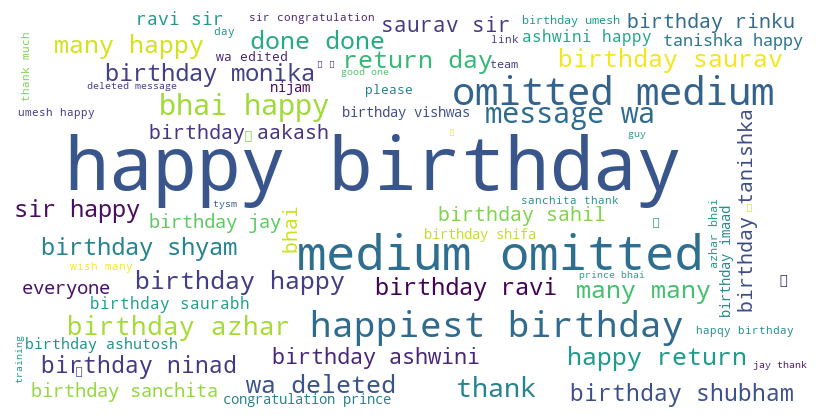

In [9]:
####### Step 4: Creating word clouds for processed chat data (our df of cleaned_messages)#########
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(message for message in df.cleaned_messages)

# create the word cloud object
wordcloud = WordCloud(
    width = 800, height = 400,
    background_color = 'white', 
    stopwords = None,  # add your stopword list if needed
    min_font_size = 10
).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

########### STEP 5 : Save the images of word cloud into your system.##########
wordcloud.to_file("Whatswordcloud.png")

In [10]:
### downloading vader for sentiment analysis, as it captures emojis and slangs as well


import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
#########Step 6: Sentiment Analysis #######

from nltk.sentiment import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

# Assuming chat_df['cleaned_message'] contains the processed chat data
df['sentiment'] = df['cleaned_messages'].apply(lambda message: senti.polarity_scores(message))

# To view the sentiment analysis results for each message
for index, row in df.iterrows():
    print(f"Message: {row['cleaned_messages']} \nSentiment: {row['sentiment']}\n")


Message: * people coming 2 wheeler please carry helmet wont b able park bike company premise without helmet 🪖 * 
Sentiment: {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3182}

Message: waah 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: < medium omitted > 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: < medium omitted > 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: amcat link : Concentrix.myamcat.com/in/er 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: team , follow instruction create referral link share personalized link family friend ... help get referral amount candidate selected join cnx . 
Sentiment: {'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'compound': 0.886}

Message: < medium omitted > 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: < medium omitted > 
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: < 

In [13]:
#generating sentiment classification for better analysis
def get_sentiment_classification(text):
    # polarity scores using VADER
    sentiment_scores = senti.polarity_scores(text)
    #  compound score to classify as positive, negative or neutral
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

#the function to each message and create a new column for the sentiment classification
df['sentiment_classification'] = df['cleaned_messages'].apply(get_sentiment_classification)

# the number of positives and negatives
sentiment_counts = df['sentiment_classification'].value_counts()
positive_count = sentiment_counts.get('Positive', 0)
negative_count = sentiment_counts.get('Negative', 0)


print(f"Number of positive messages: {positive_count}")
print(f"Number of negative messages: {negative_count}")


Number of positive messages: 663
Number of negative messages: 1


In [14]:
#messages with positive sentiment
positive_messages = df[df['sentiment_classification'] == 'Positive']
print("Positive Messages:")
print(positive_messages[['author', 'cleaned_messages']])

# messages with a negative sentiment
negative_messages = df[df['sentiment_classification'] == 'Negative']
print("\nNegative Messages:")
print(negative_messages[['author', 'cleaned_messages']])


# to extract and display neutral messages, follow the same pattern
neutral_messages = df[df['sentiment_classification'] == 'Neutral']
print("Some Neutral Messages:")
print(neutral_messages[['author', 'cleaned_messages']].head())

### we can cleary see it classifies most messages as positive which is the correct insight 
###, negative message is only 1 as it vader misclassifies it
### also neutral messages are clearly normal application/commands messages which doesnt signify anything....

Positive Messages:
                         author  \
0               +91 97621 11914   
5    Prince Verma Bytedance Cnx   
9               +91 99229 24001   
10              +91 99229 24001   
13              +91 75584 16471   
..                          ...   
898           Nikita Concentrix   
899             +91 91302 80163   
900             +91 98500 45479   
912        Ravi Jain Concentrix   
913        Ravi Jain Concentrix   

                                      cleaned_messages  
0    * people coming 2 wheeler please carry helmet ...  
5    team , follow instruction create referral link...  
9    team , also send family friend walk-in intervi...  
10            minimum 1 year work experience mandatory  
13   guy training , training ’ mean come late shift...  
..                                                 ...  
898                        happy birthday saurabh 🎂🎉🎉🎊  
899                              thank kind wish ! ! 🥂  
900                          happy birthday sau

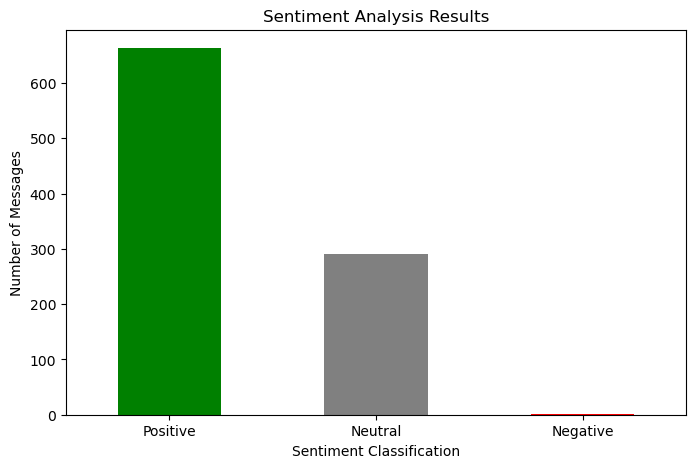

In [16]:
####### plotting our sentiment classification for a better analysis#######


sentiment_counts = df['sentiment_classification'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red']) 
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0) 
plt.show()

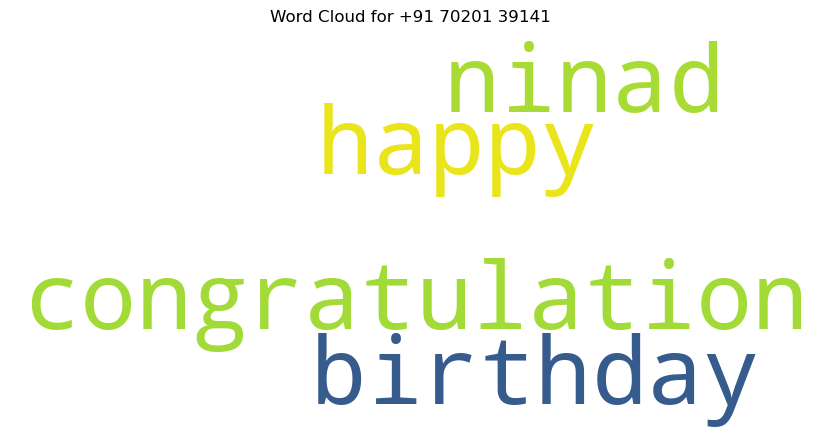

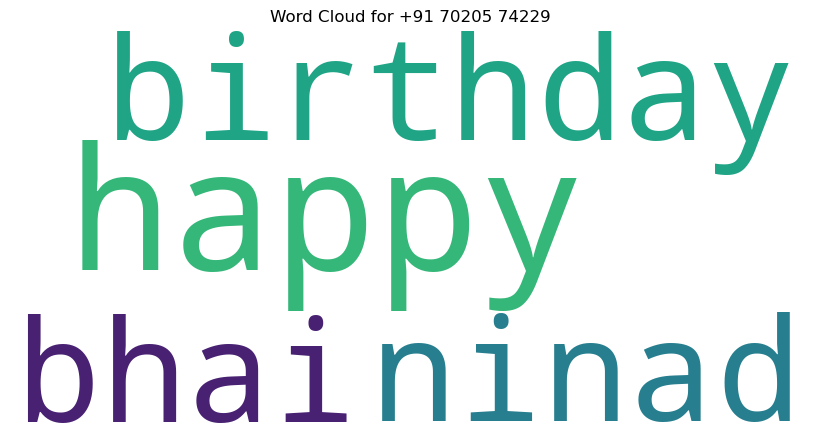

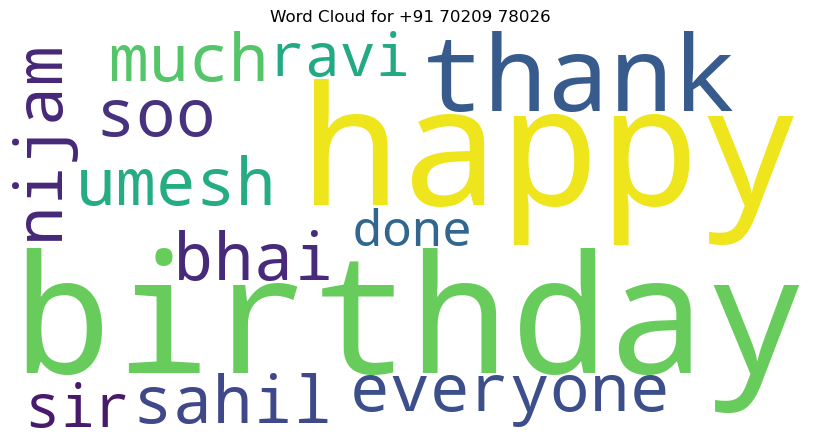

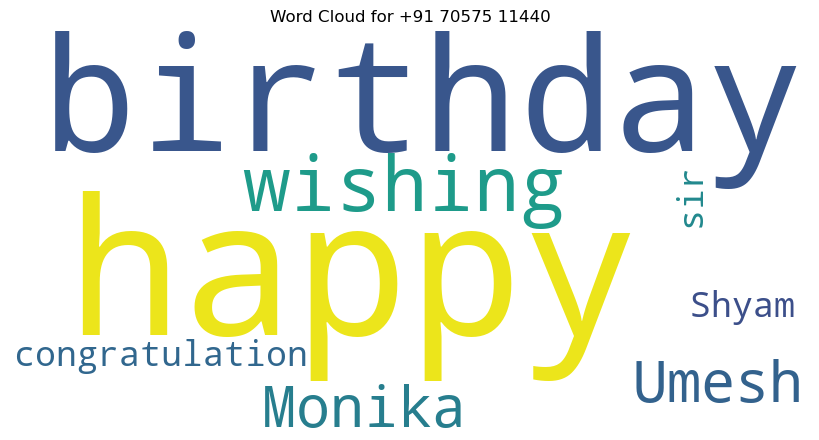

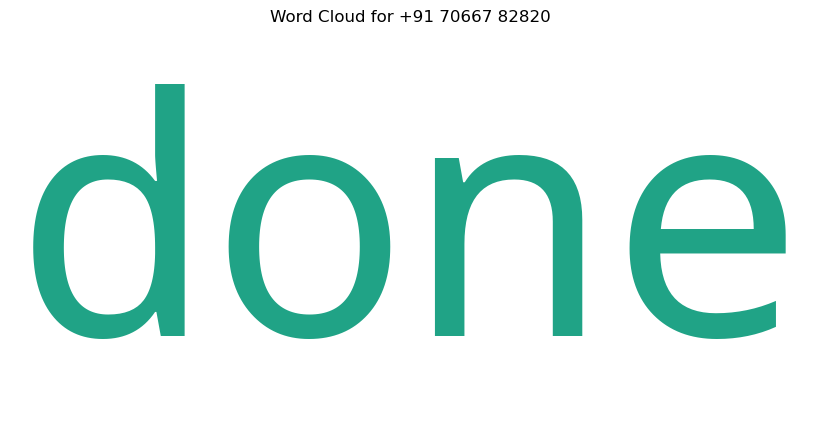

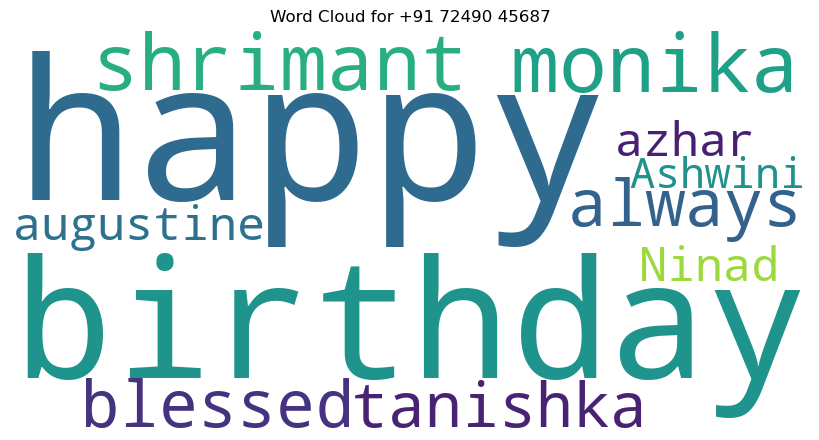

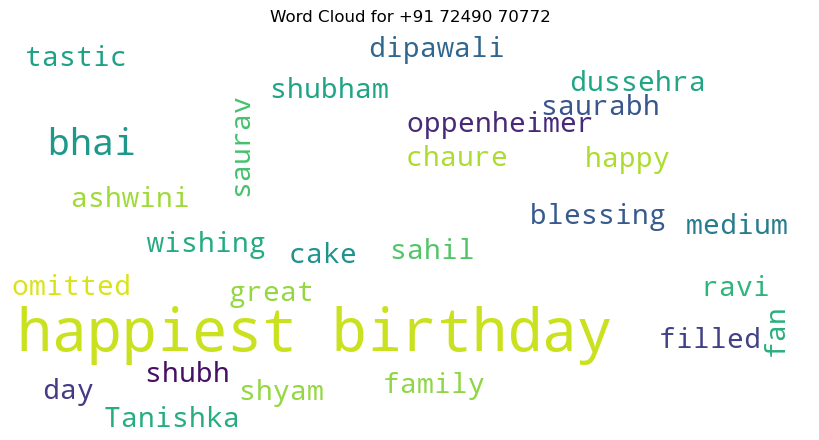

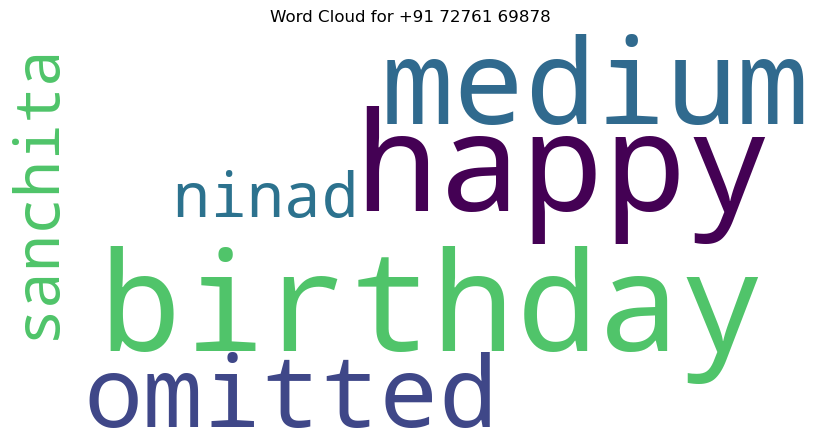

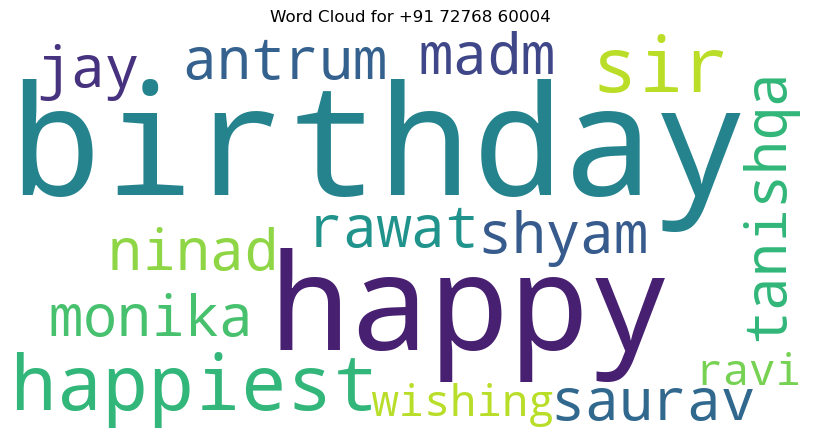

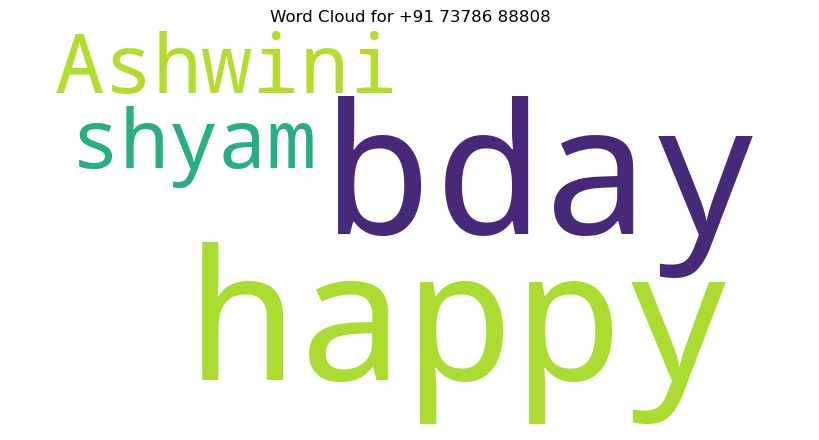

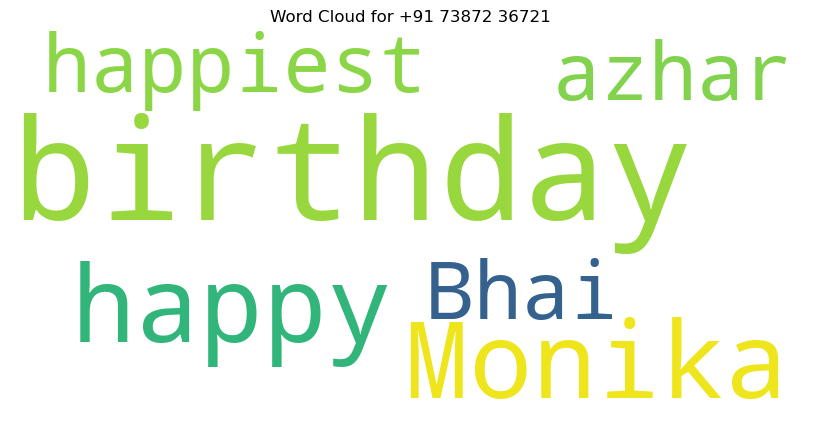

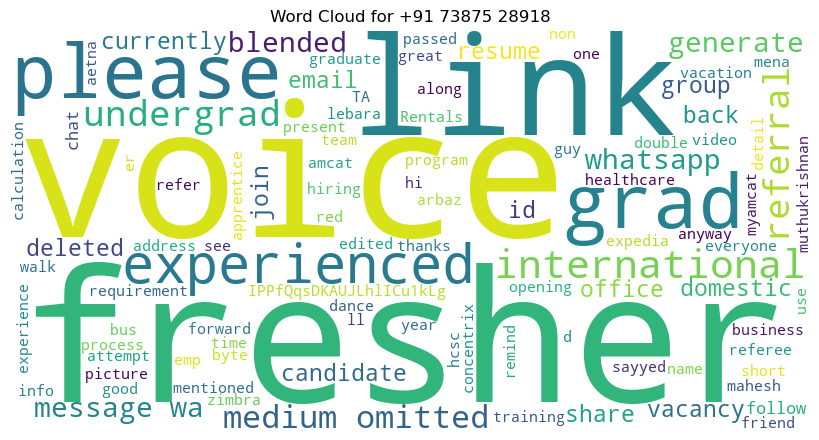

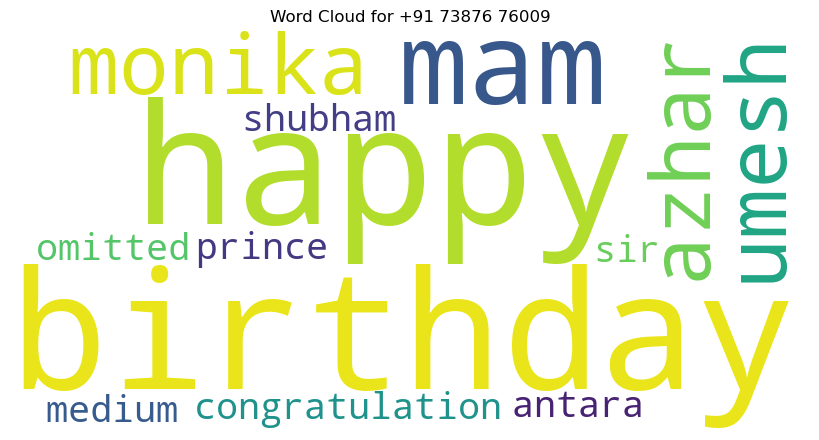

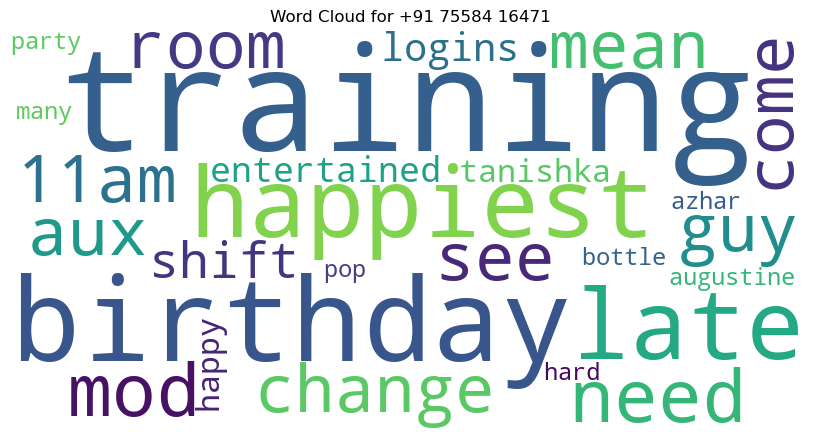

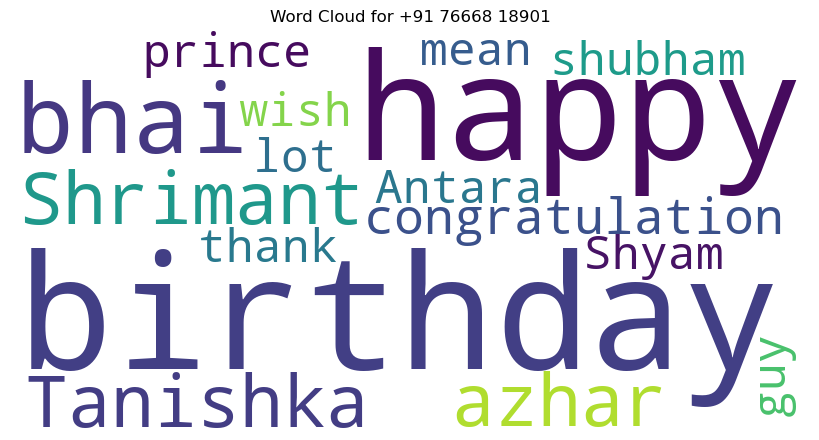

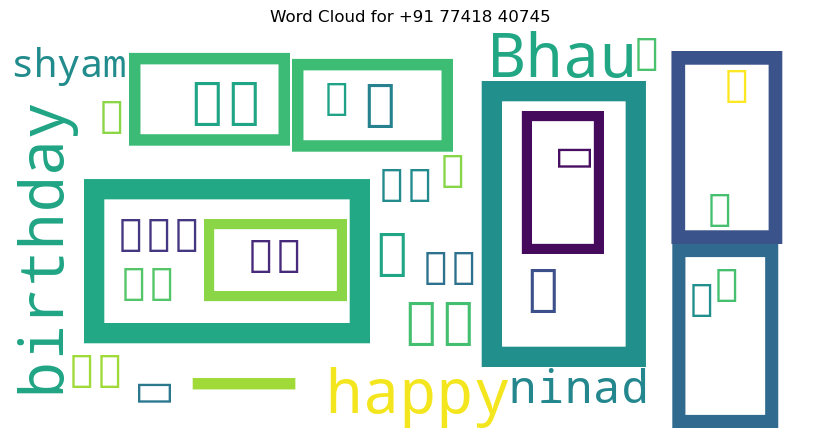

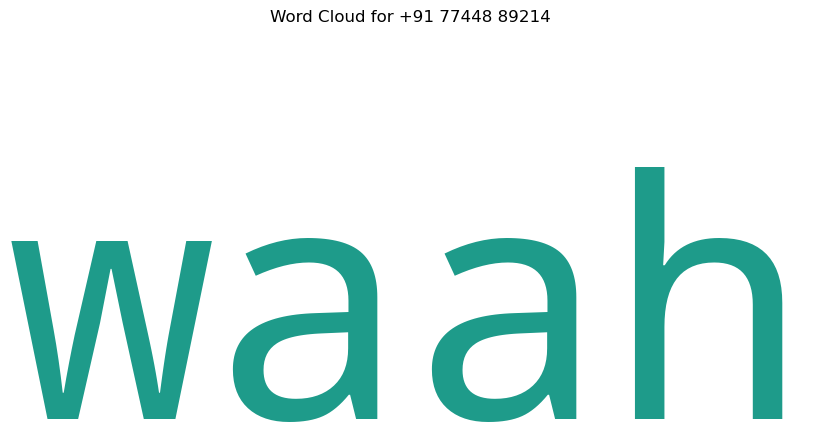

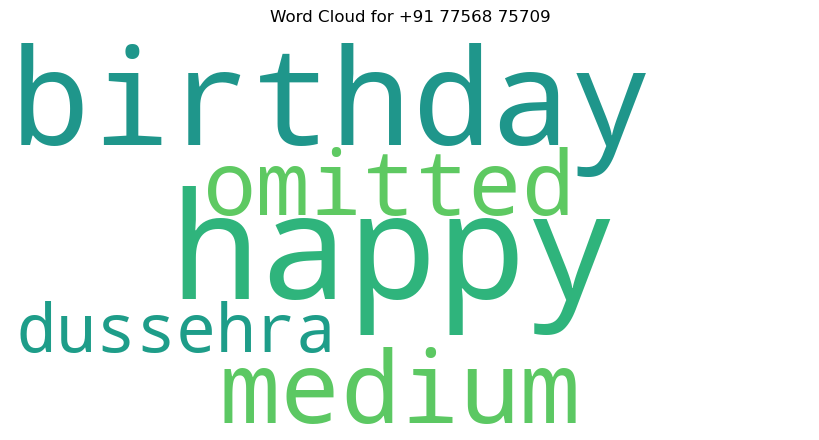

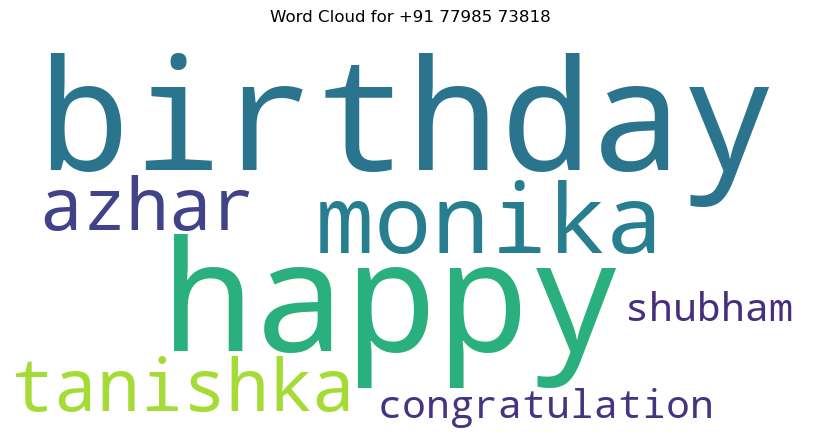

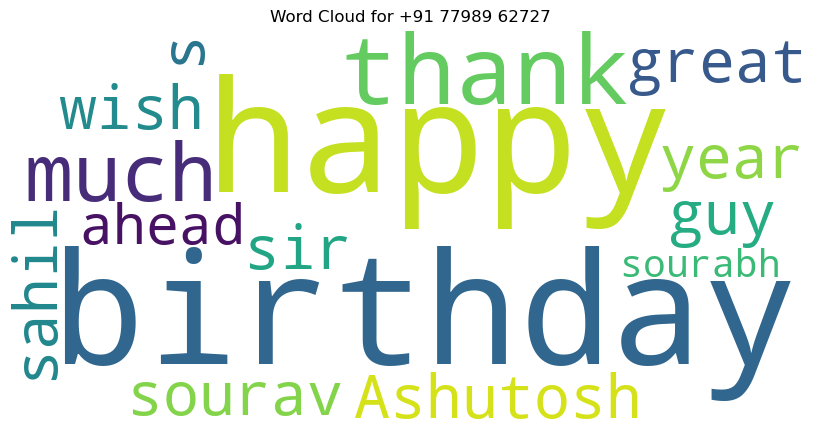

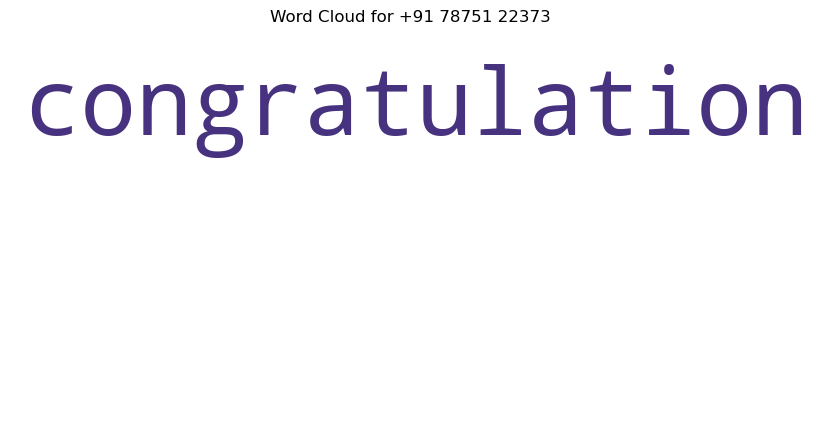

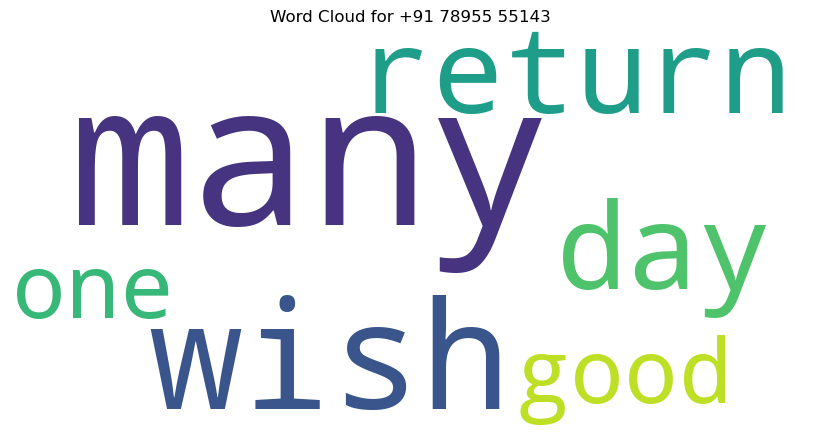

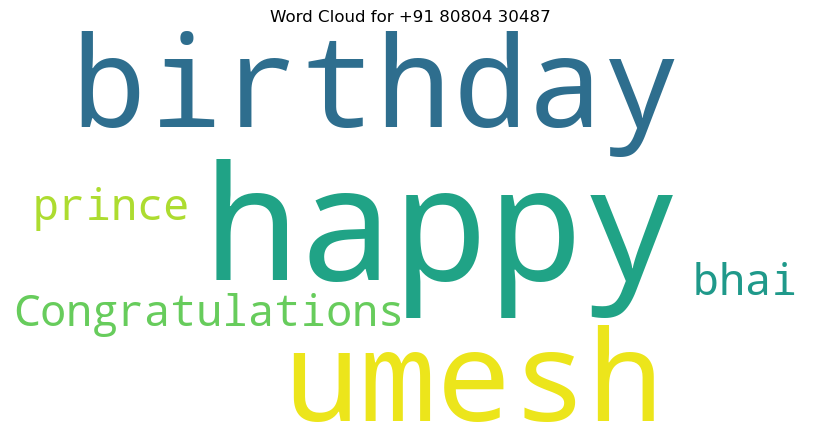

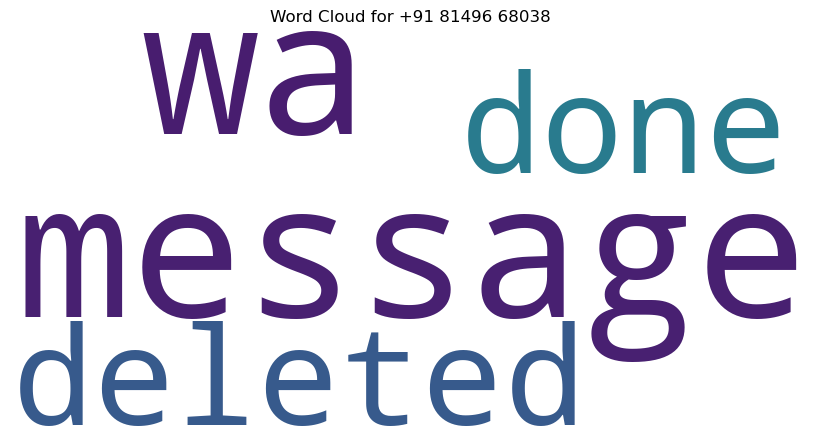

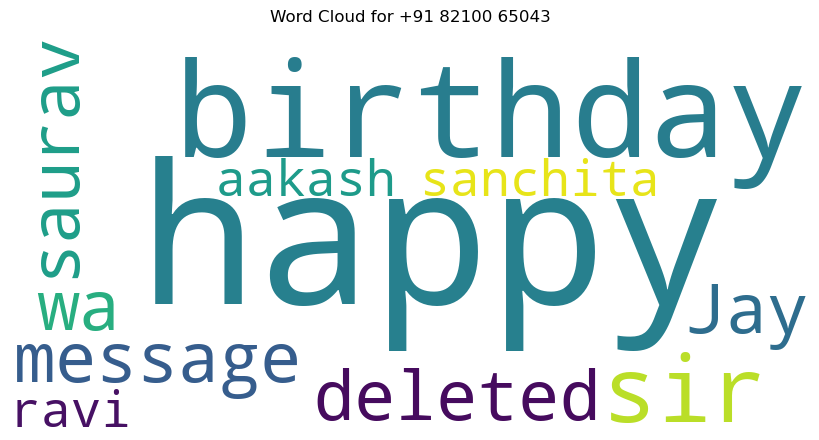

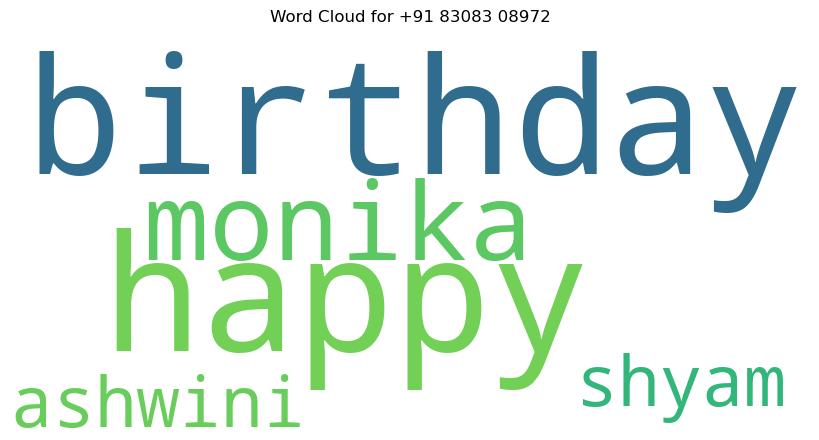

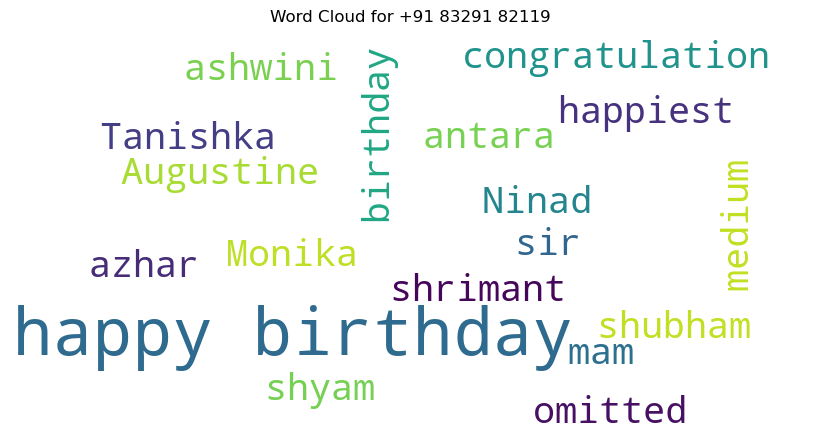

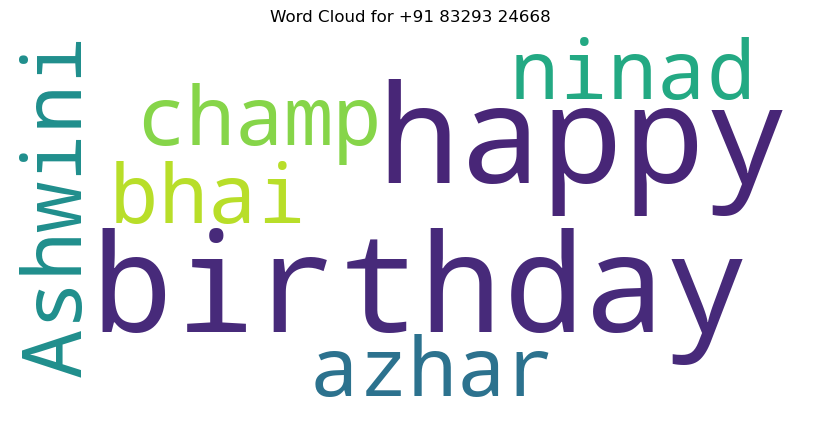

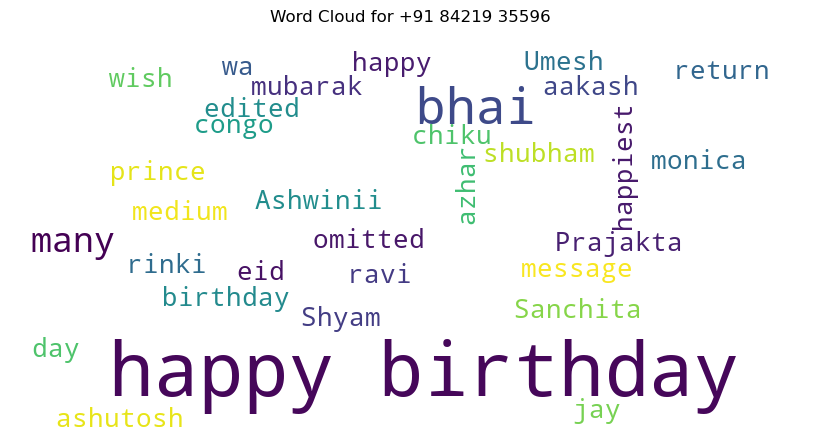

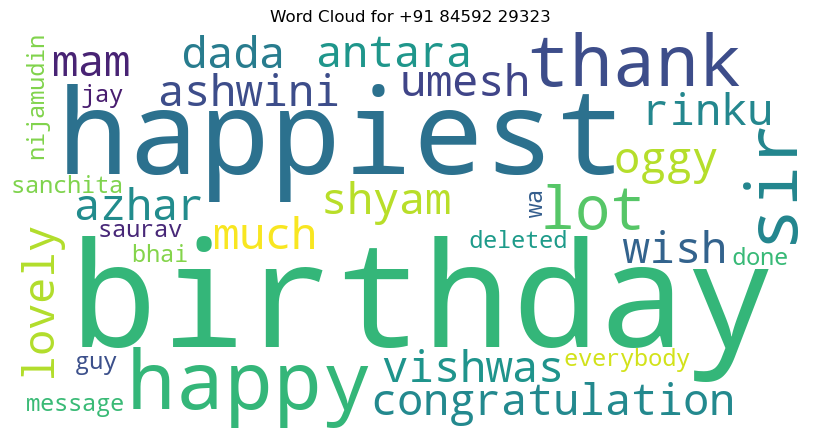

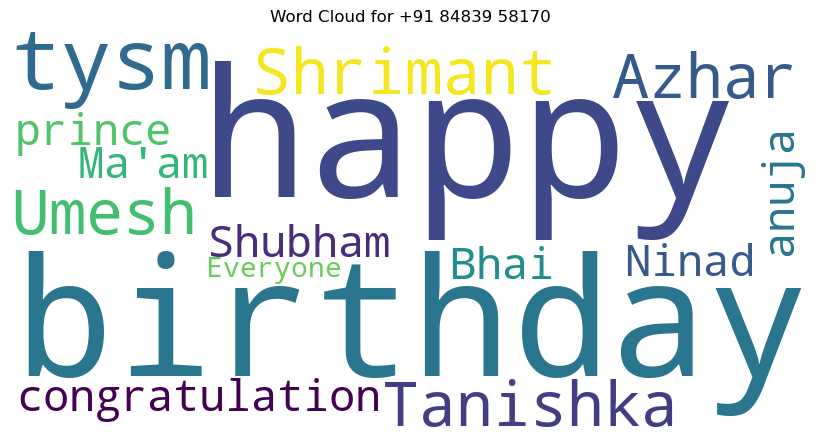

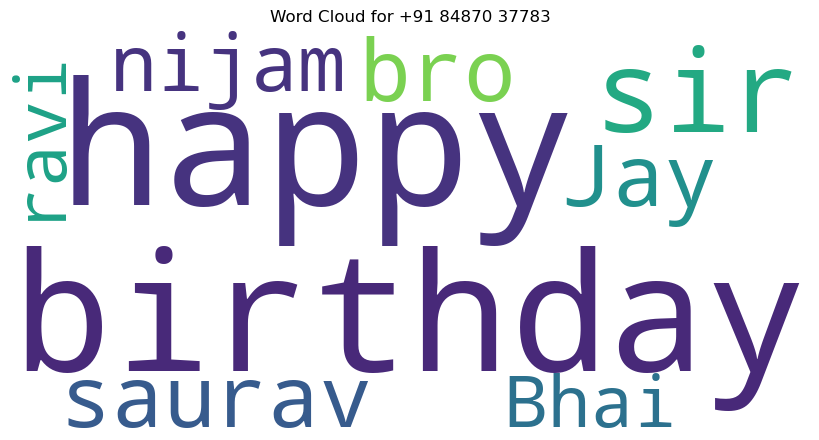

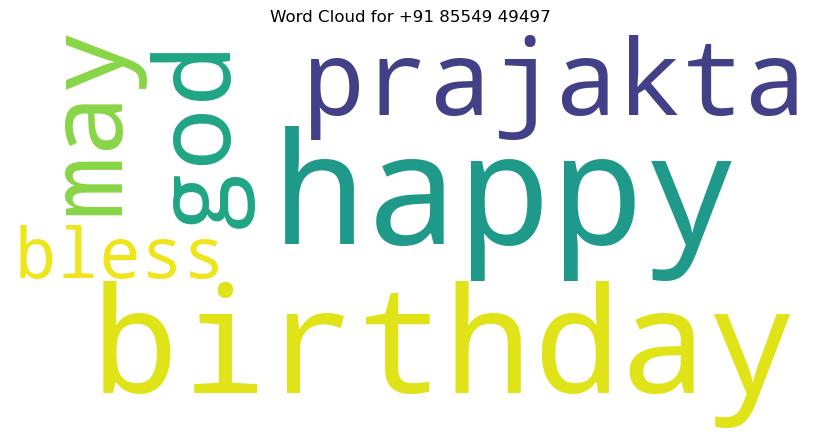

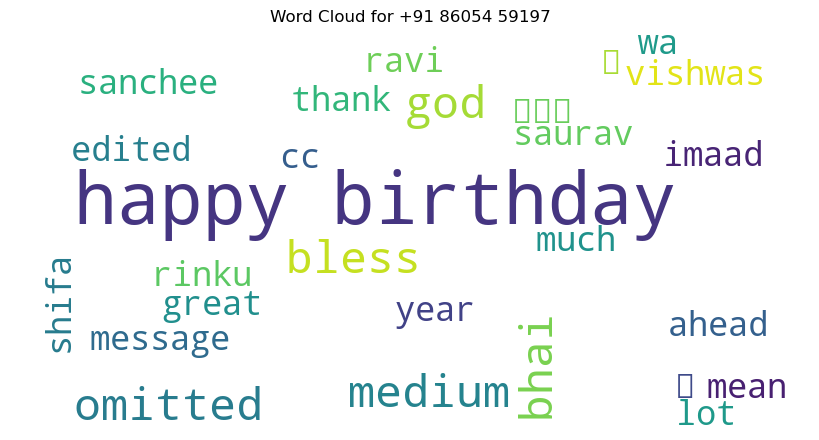

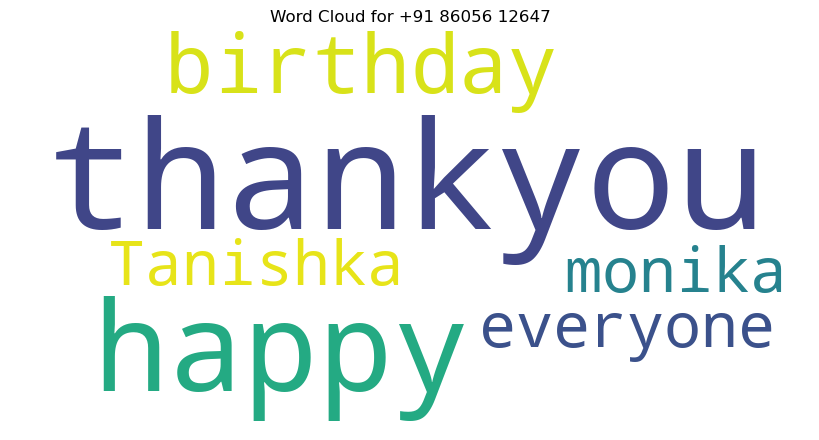

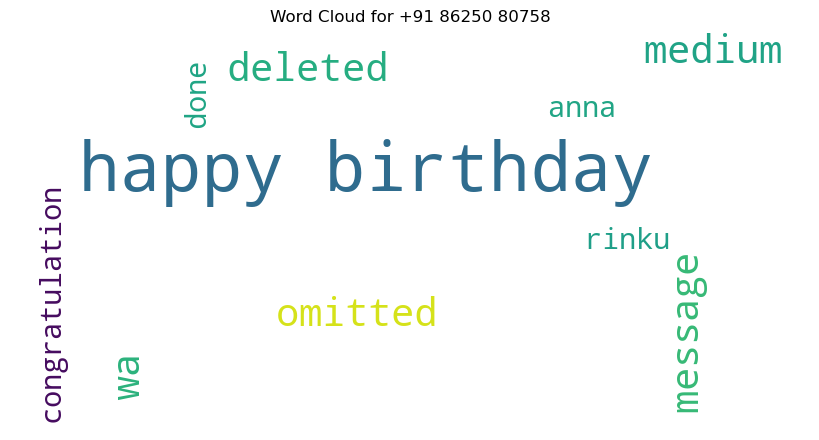

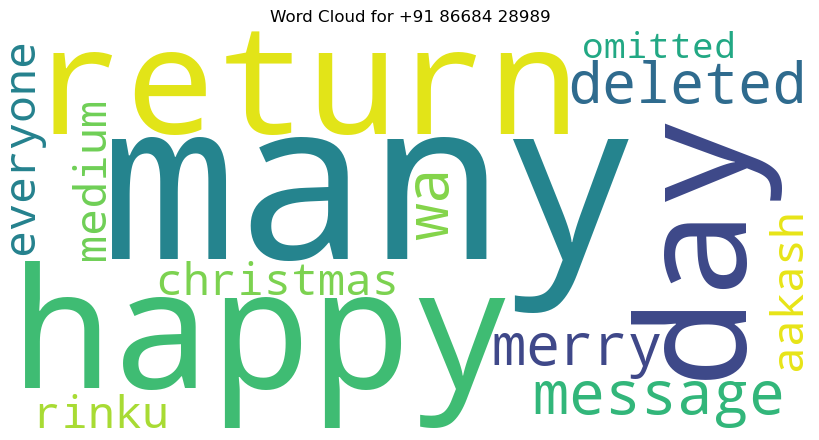

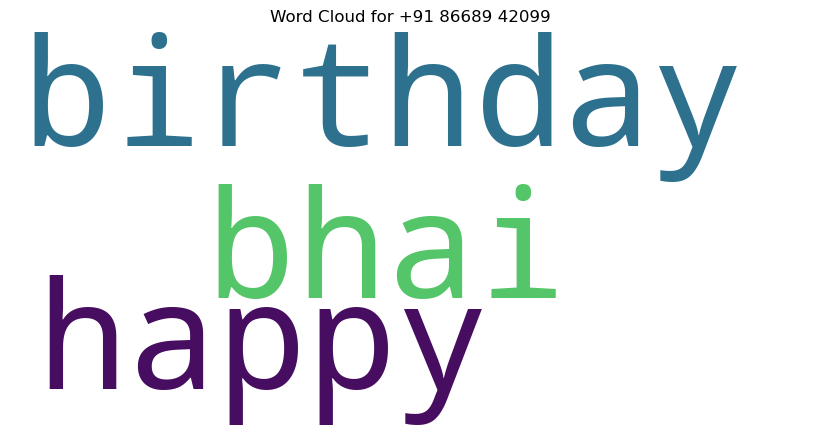

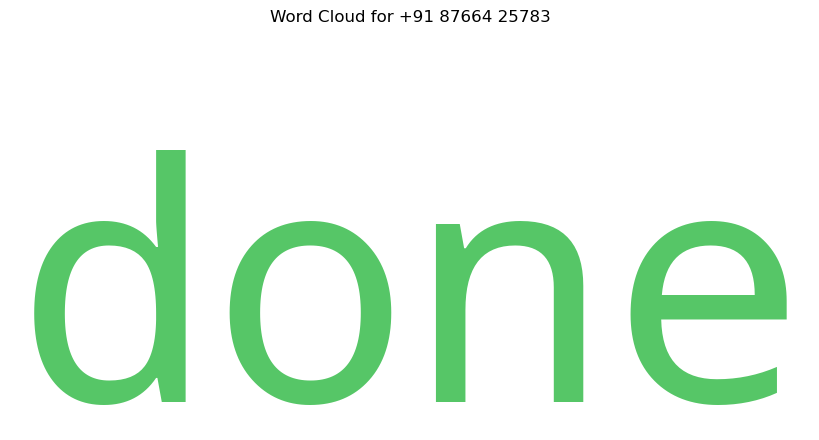

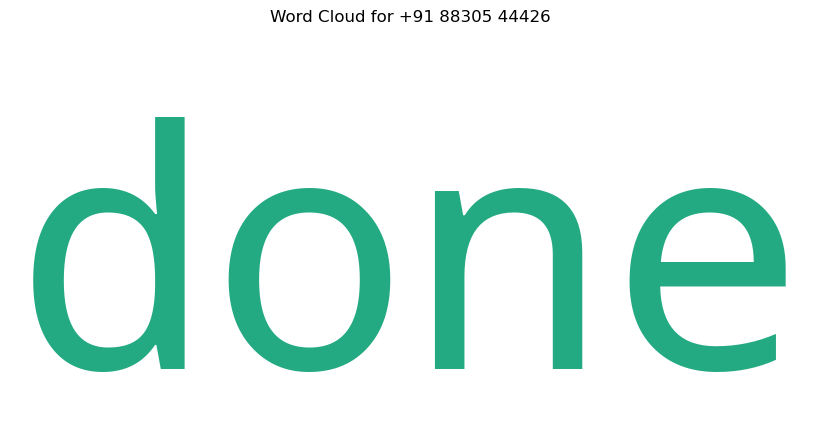

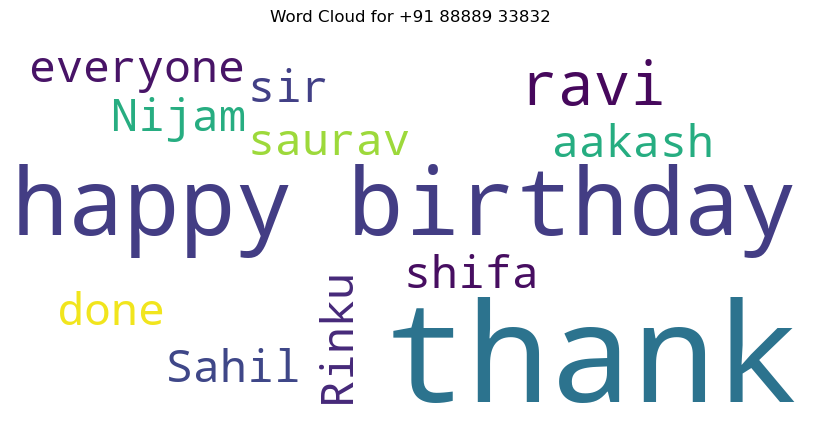

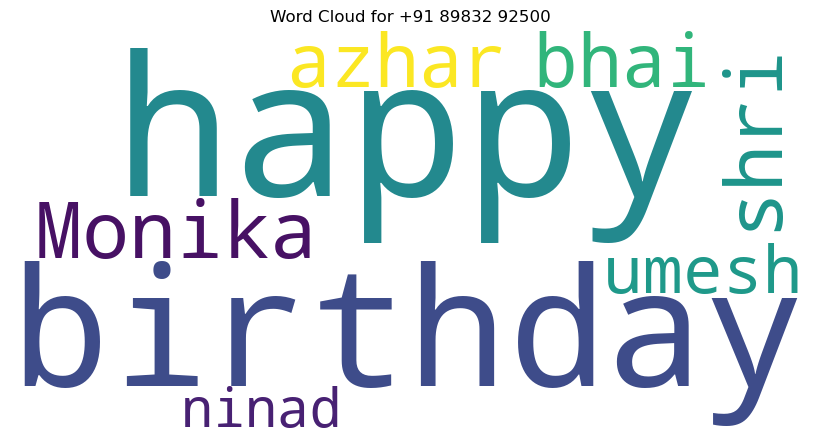

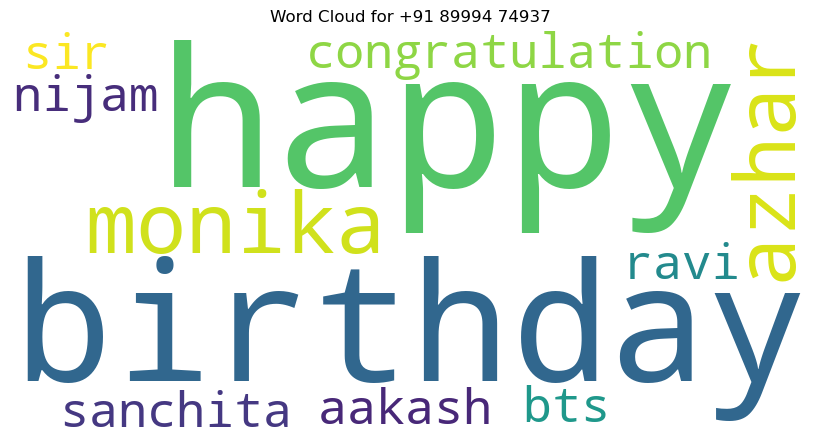

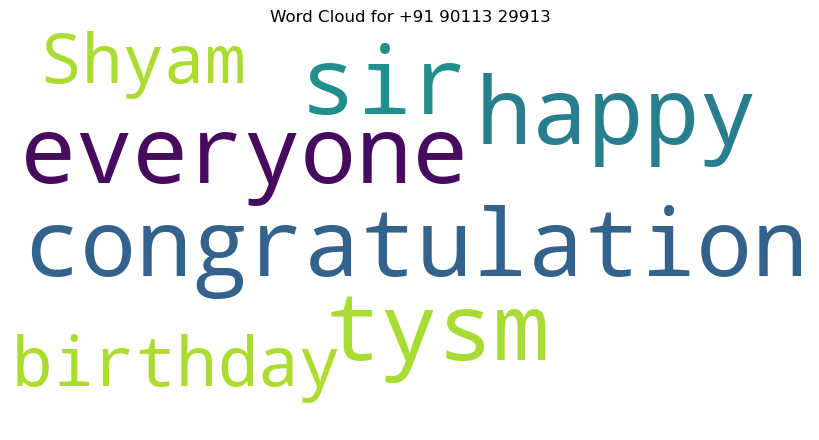

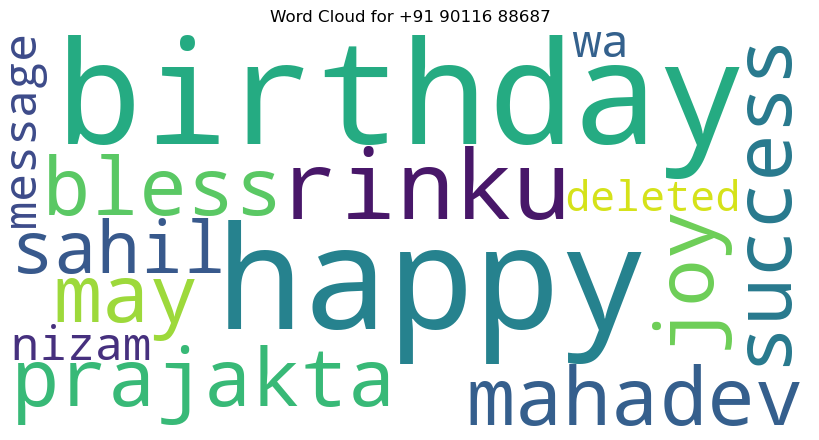

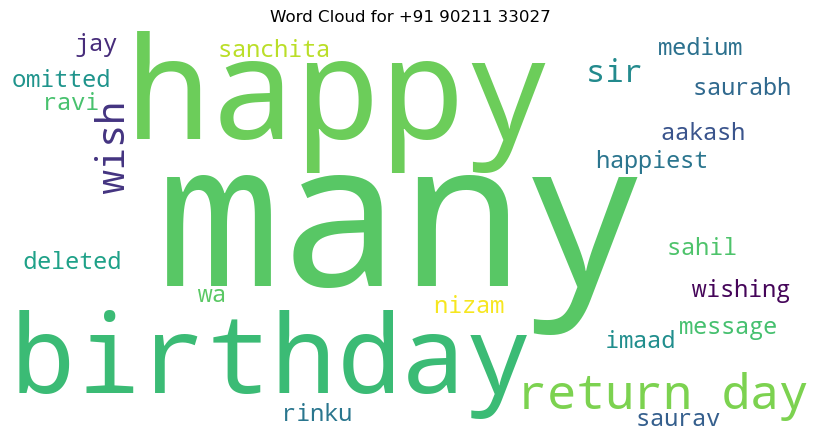

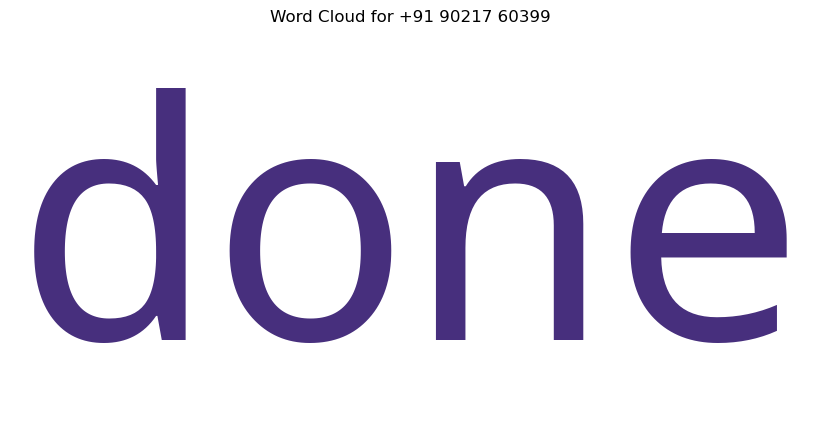

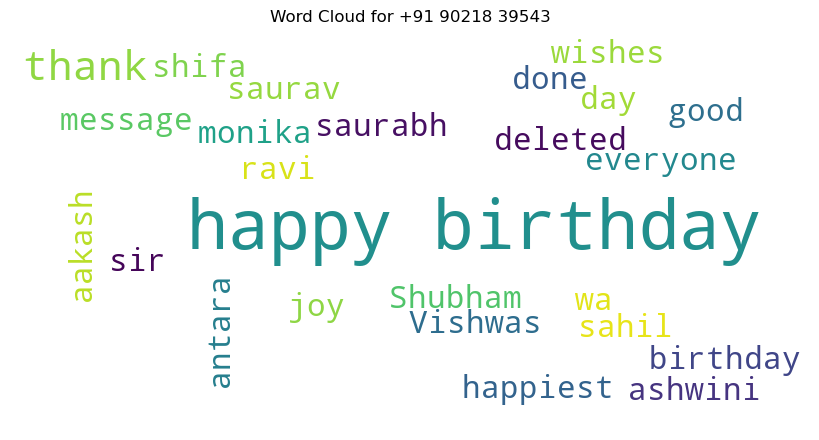

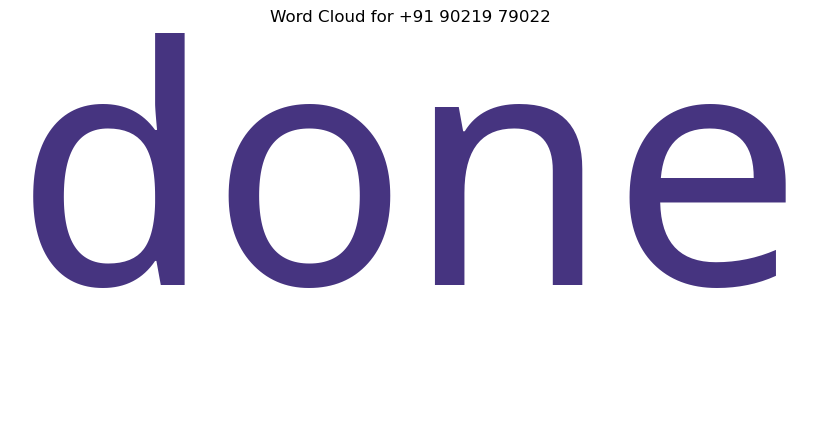

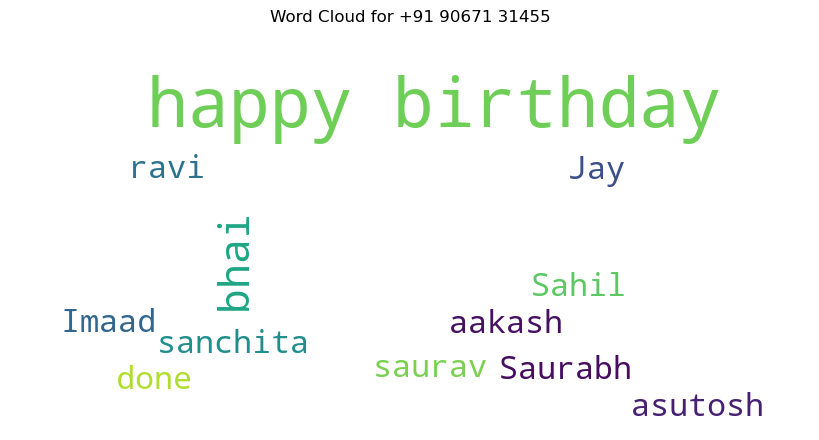

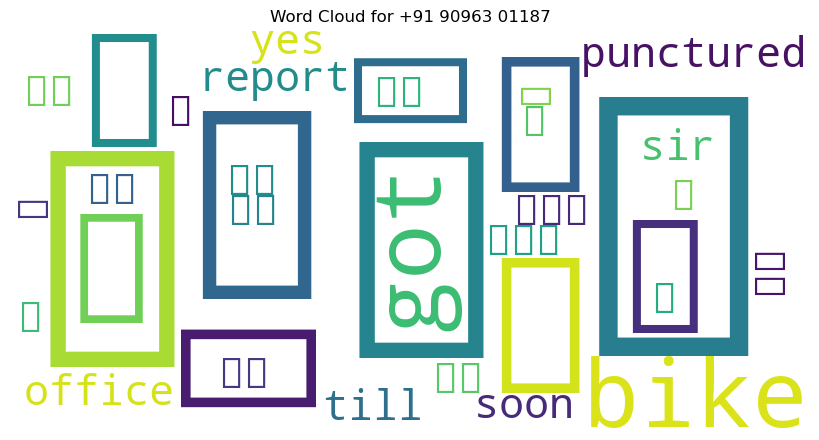

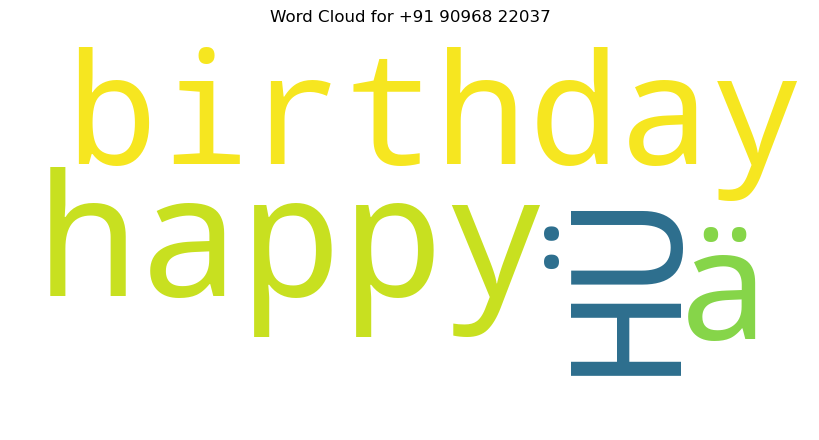

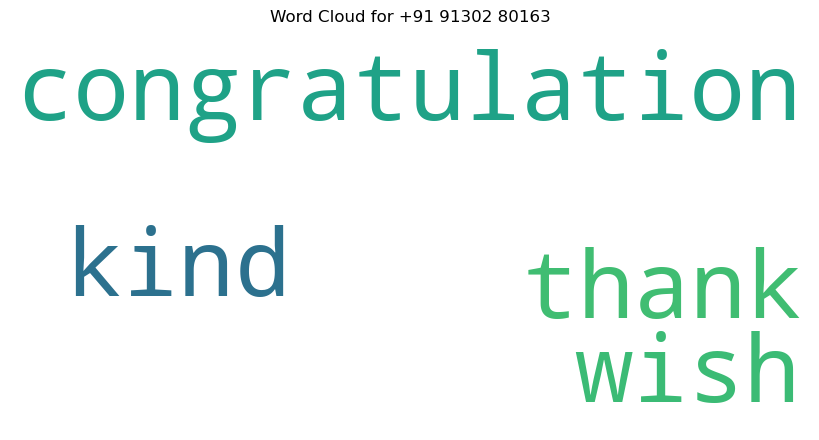

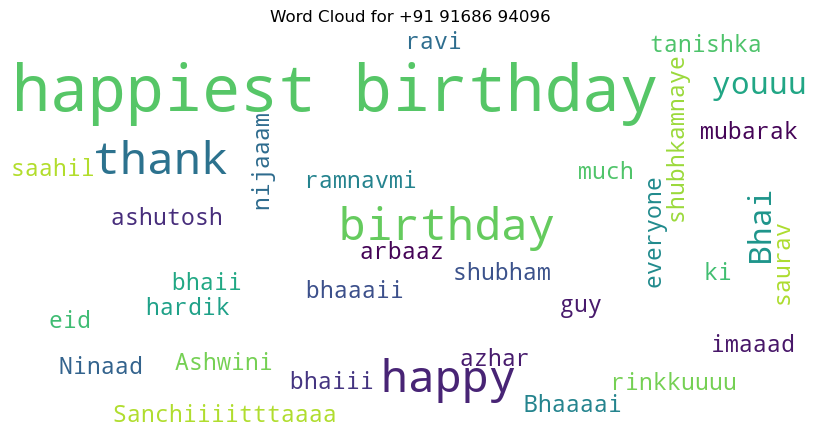

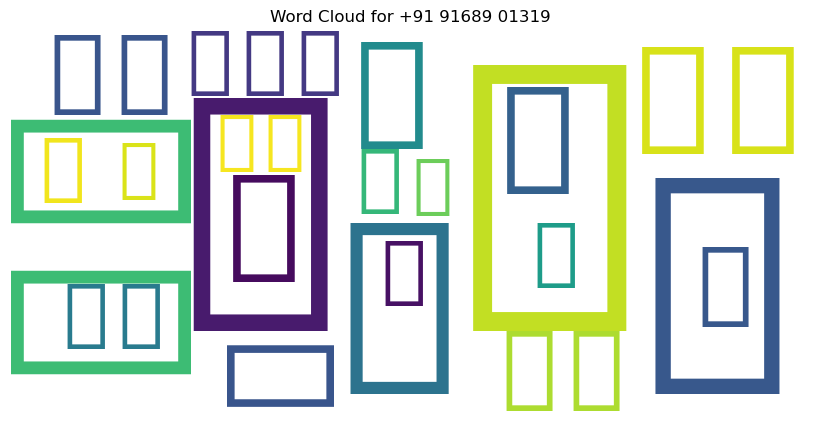

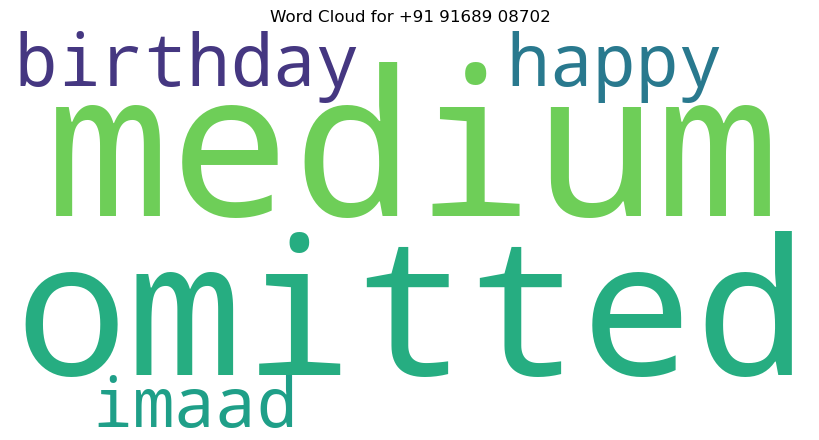

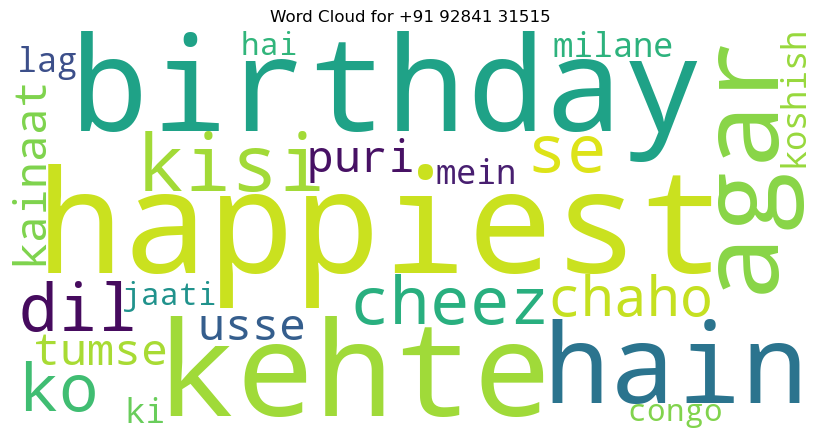

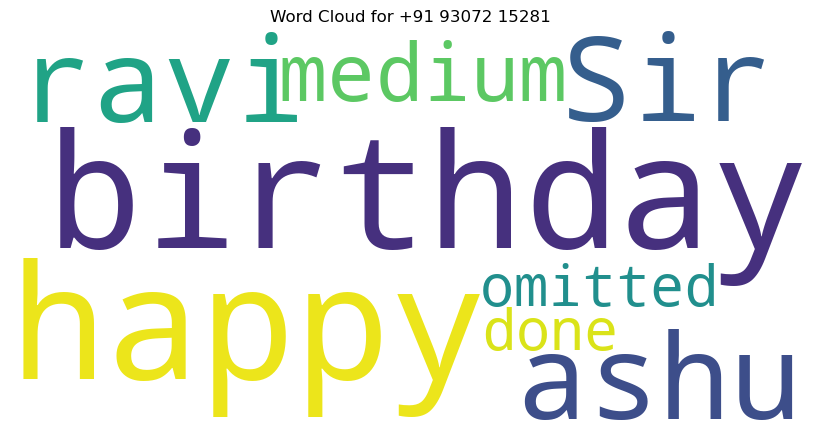

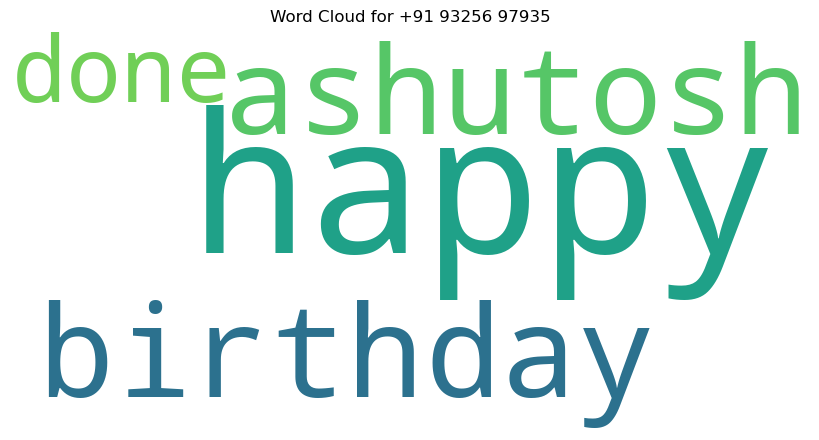

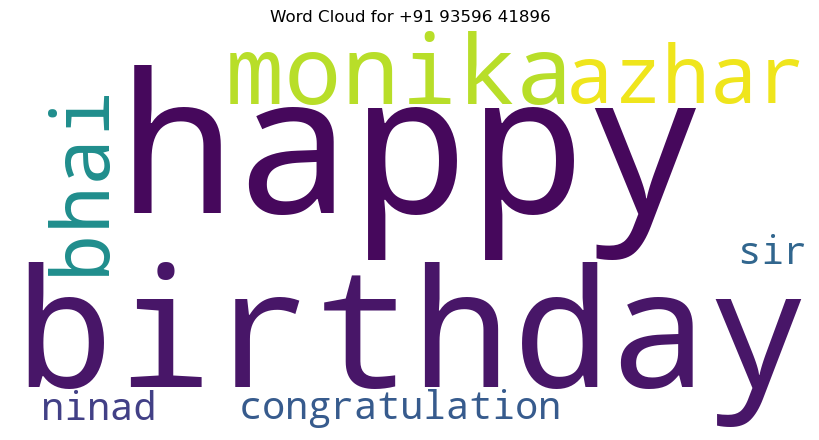

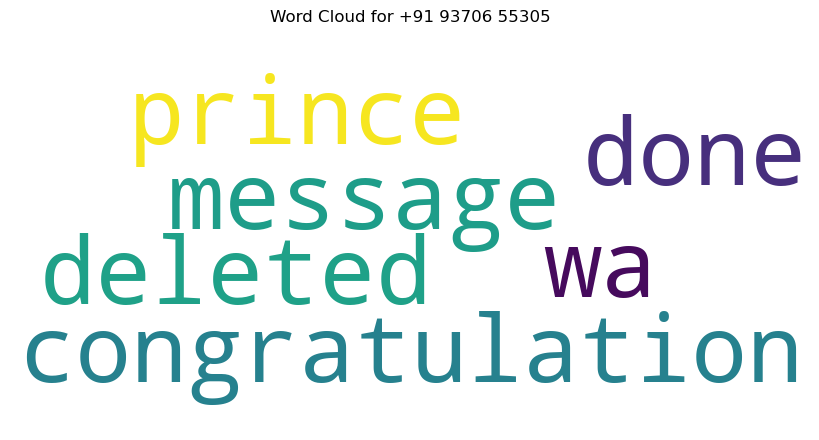

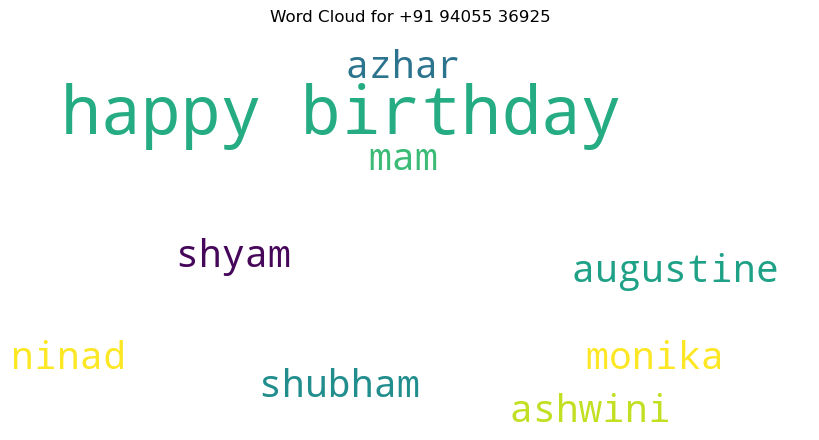

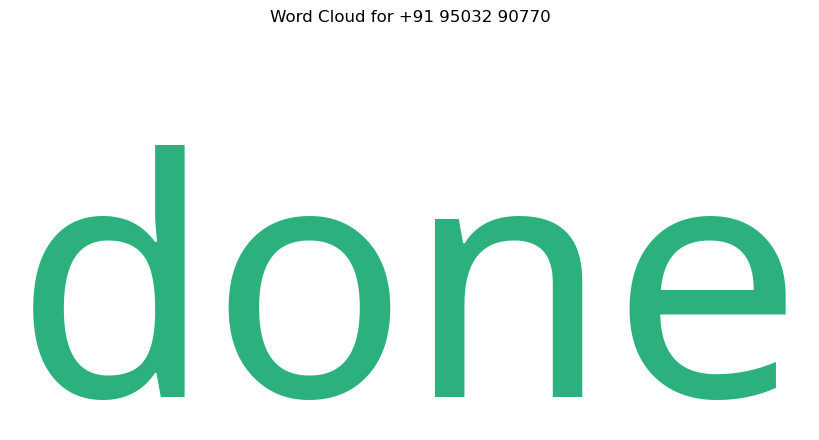

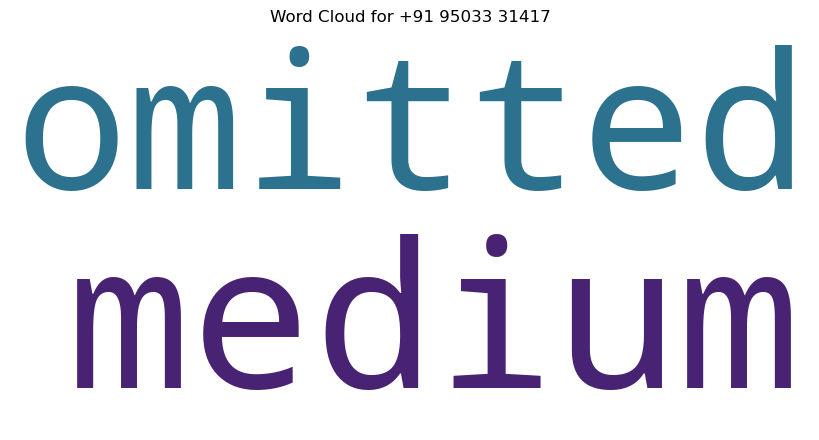

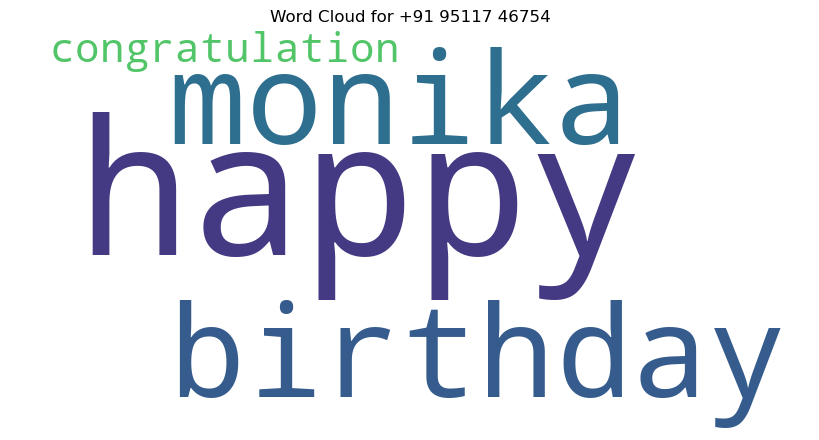

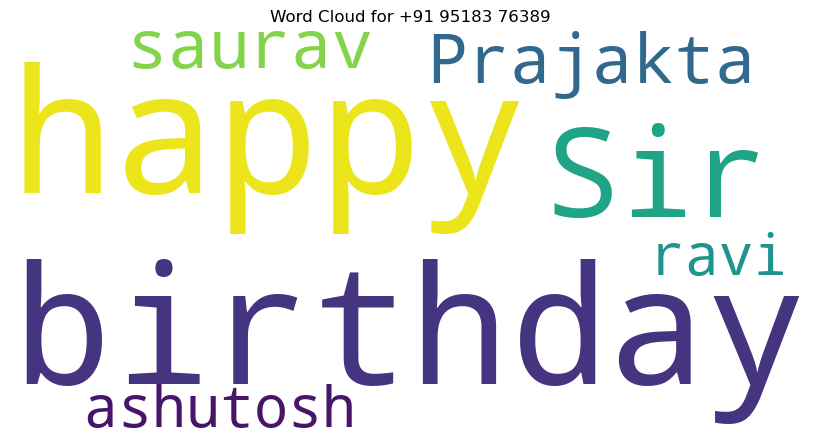

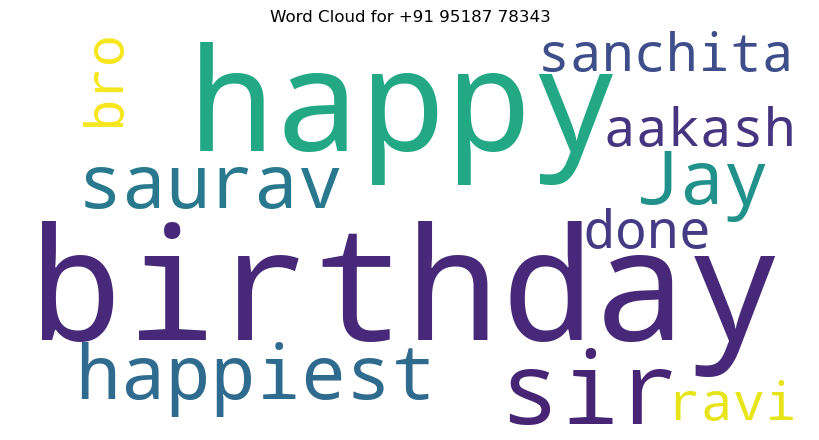

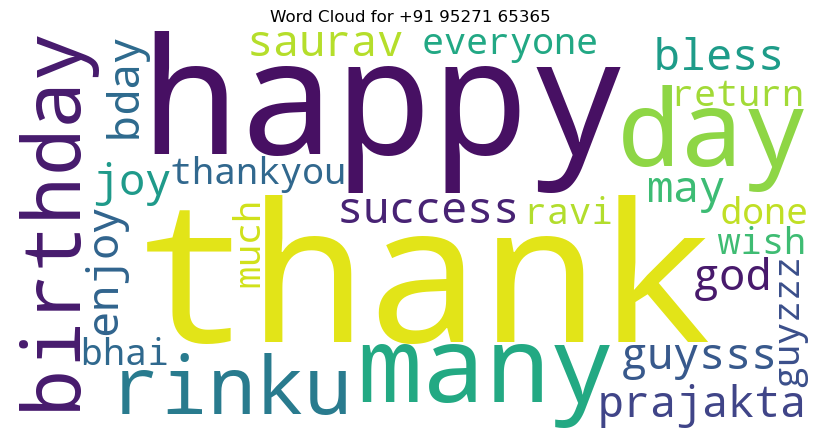

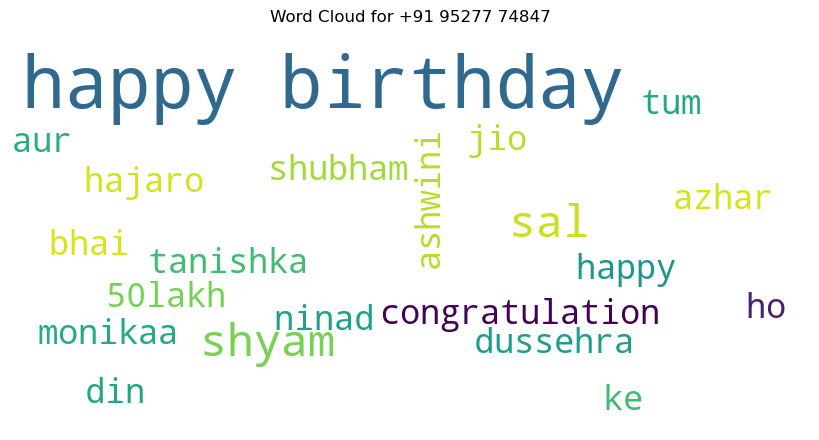

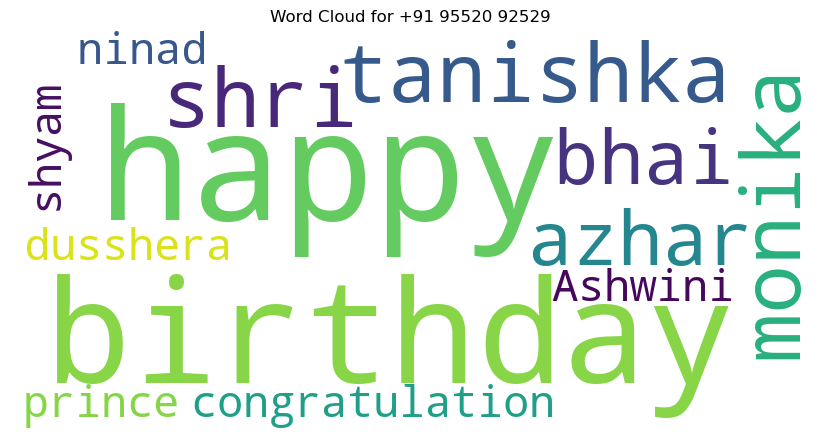

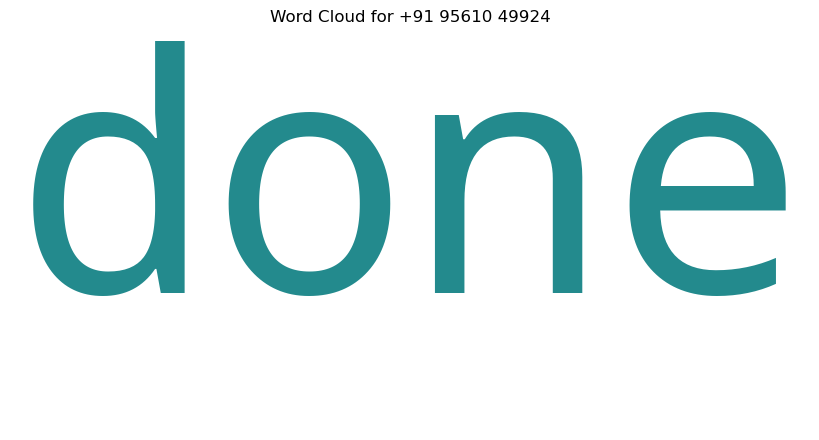

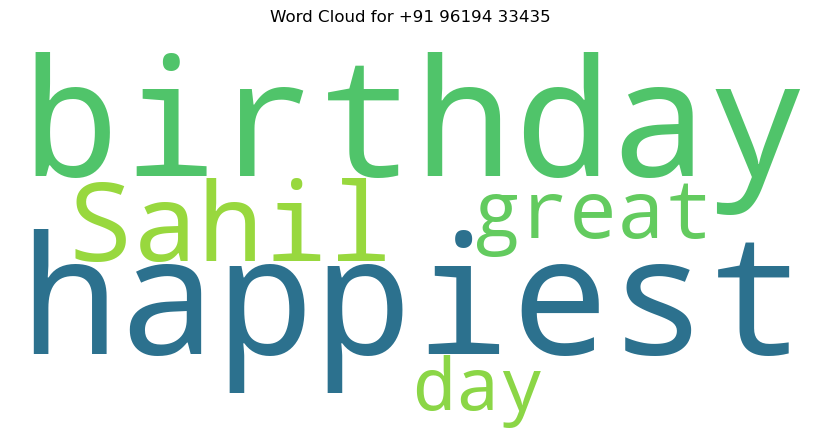

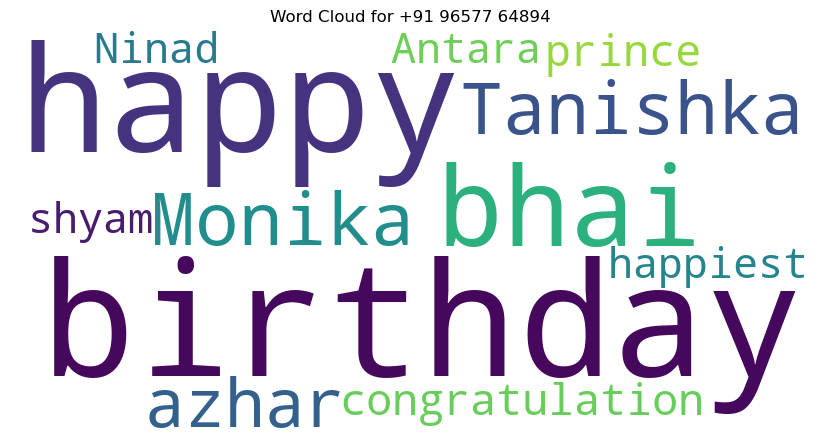

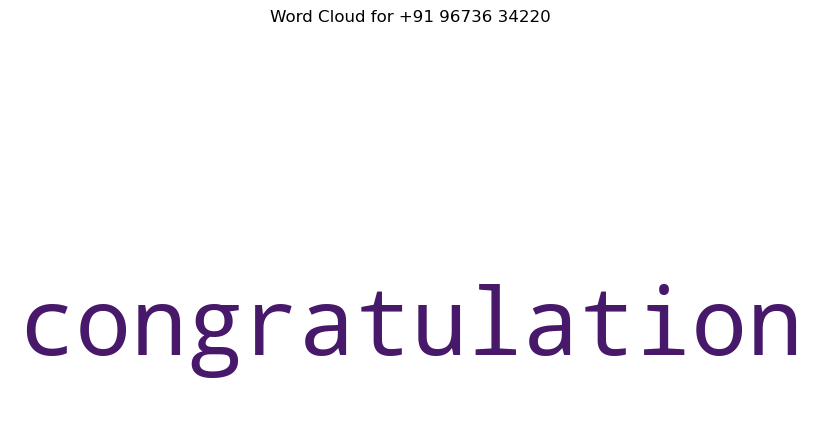

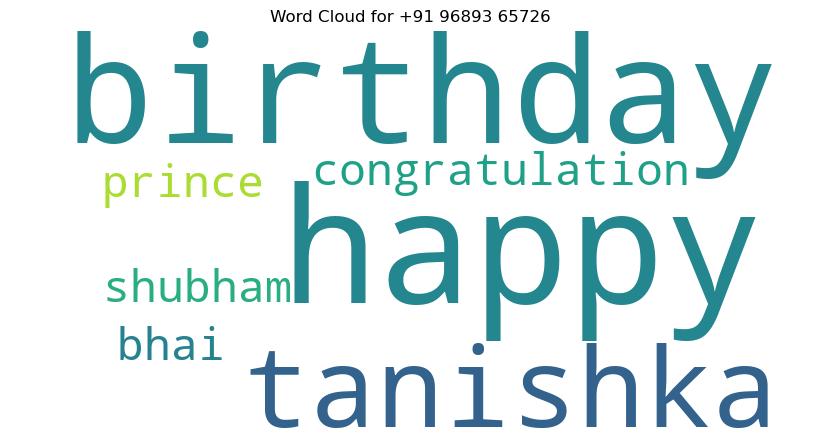

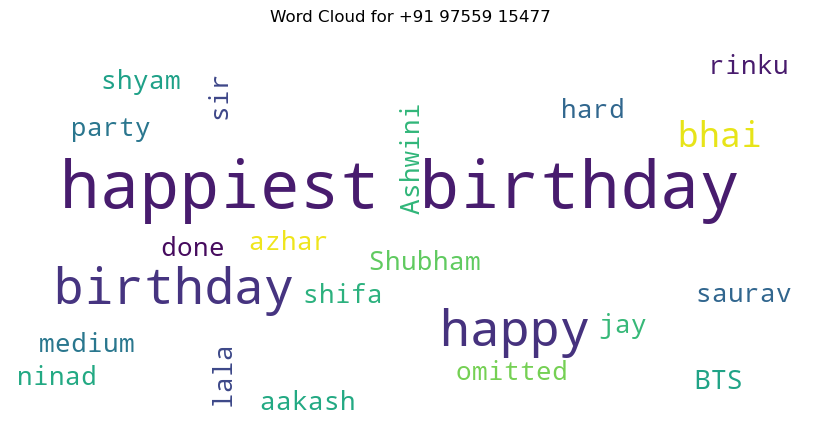

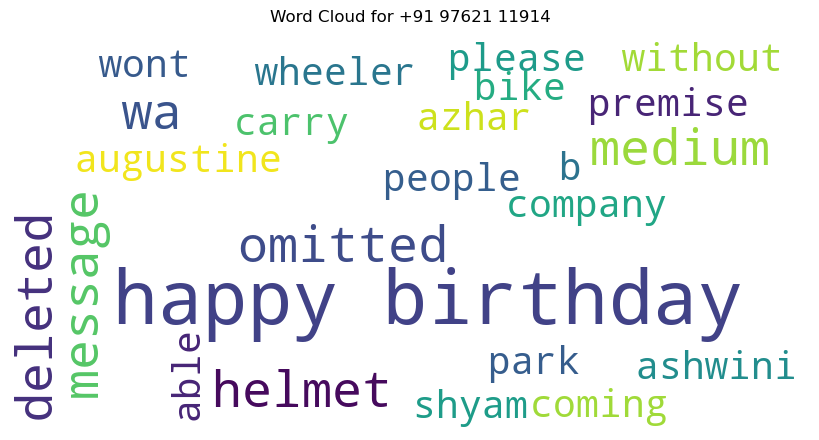

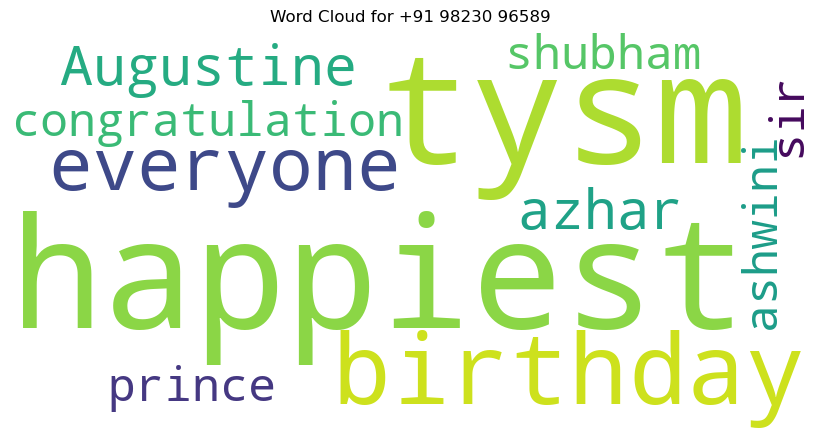

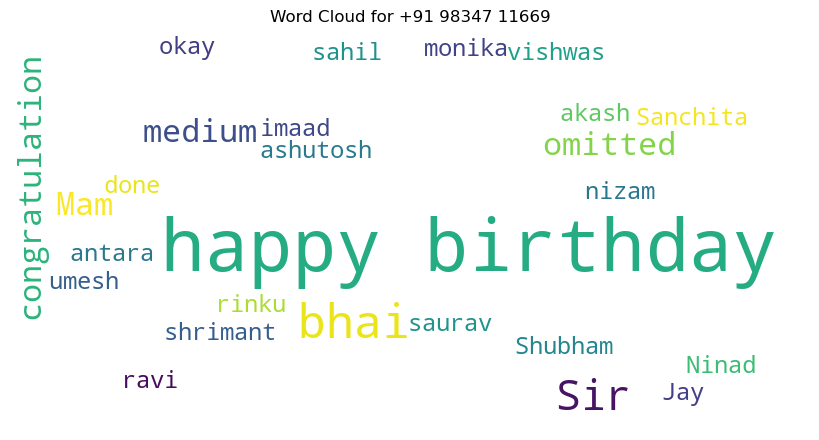

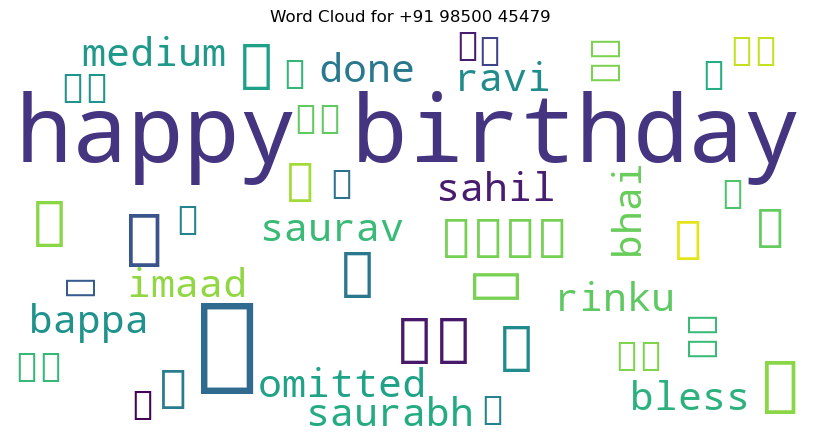

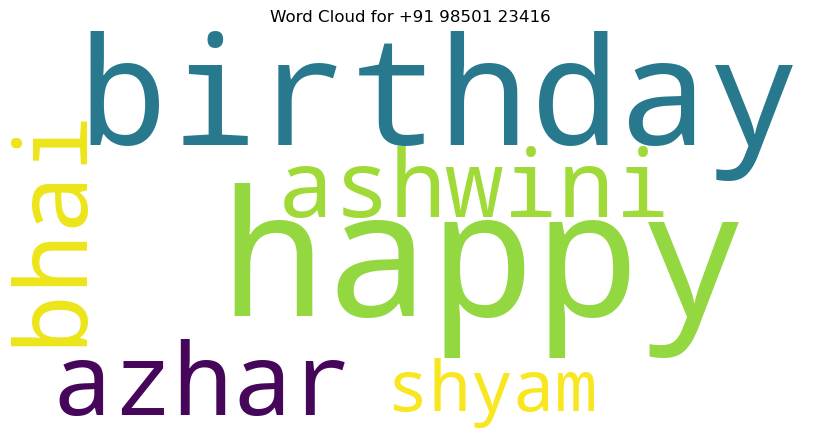

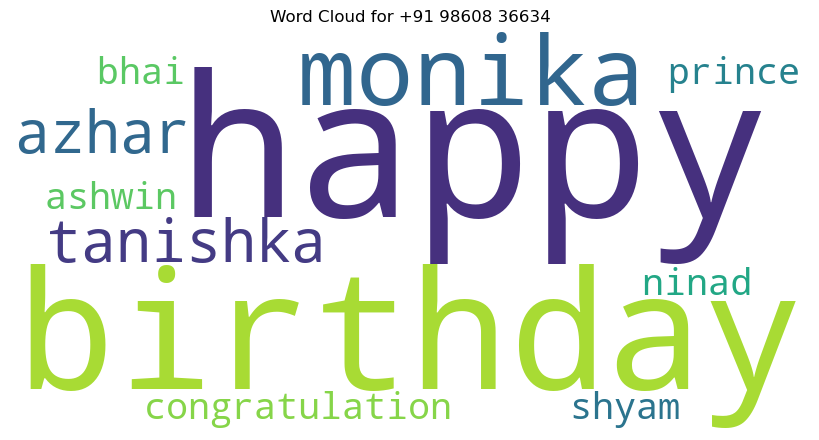

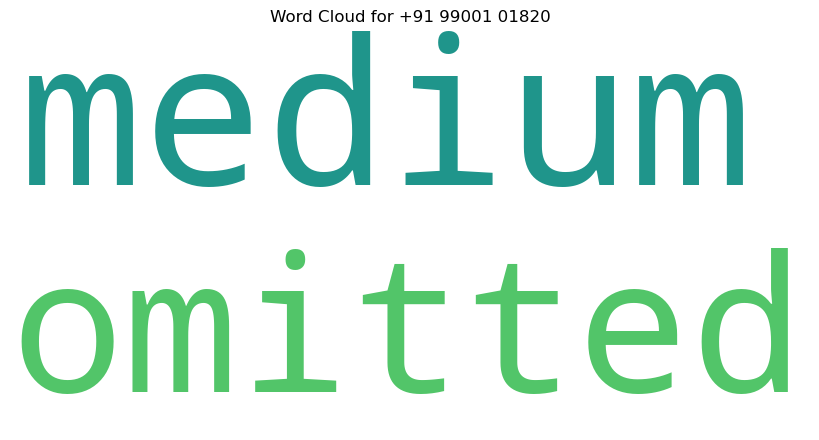

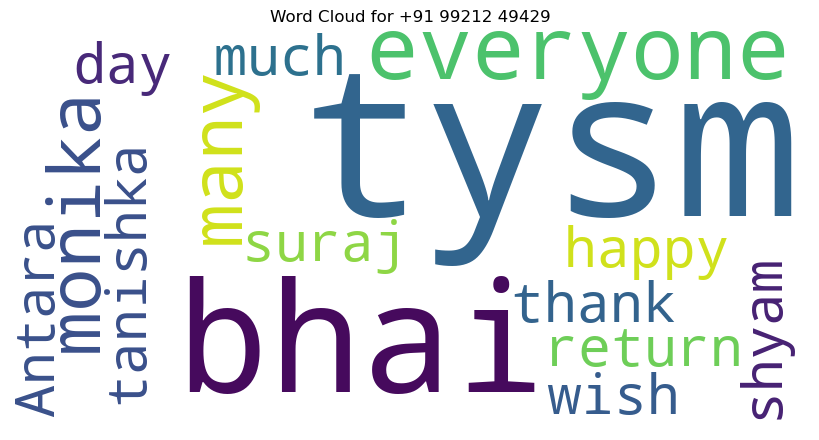

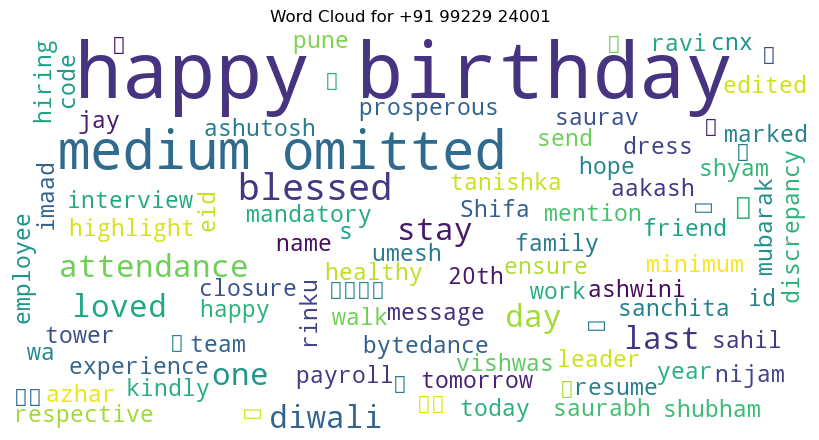

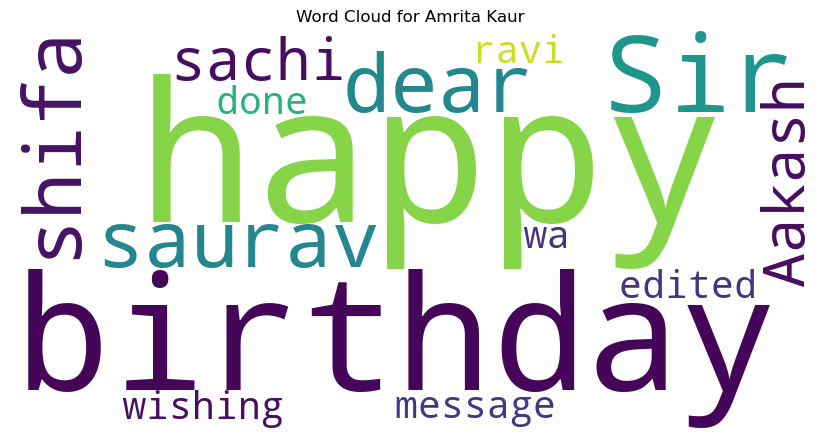

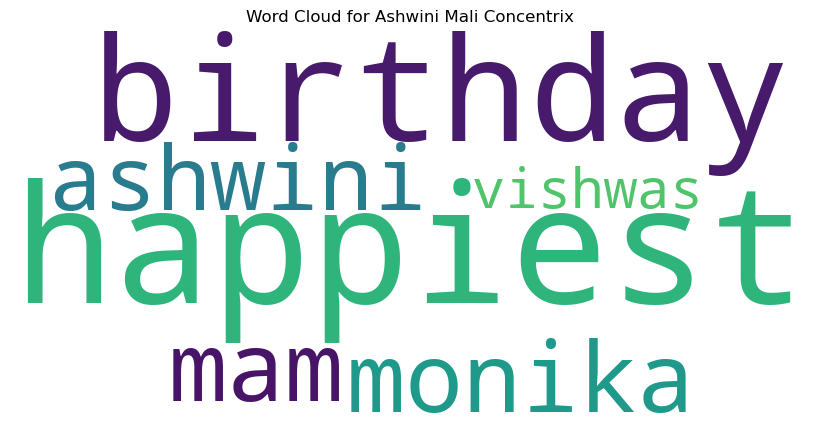

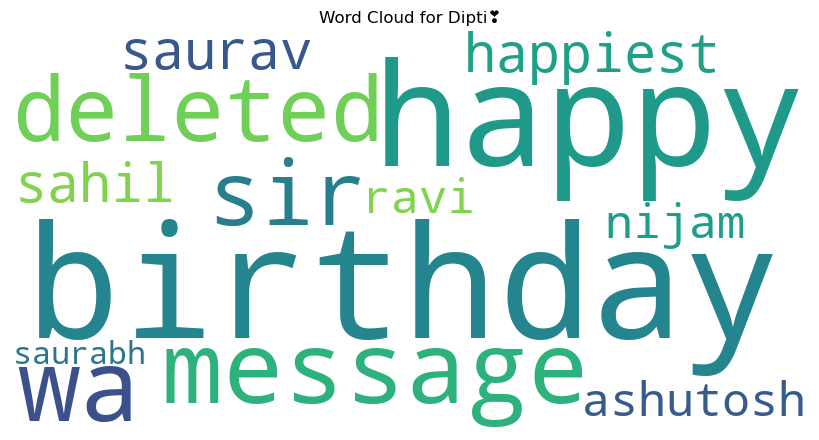

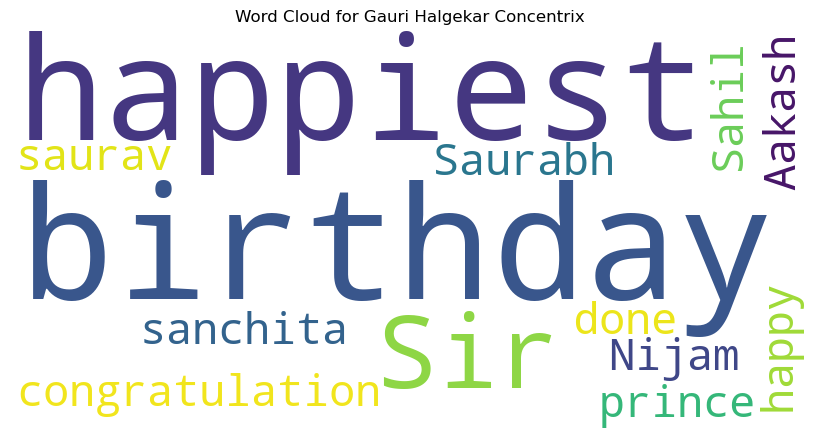

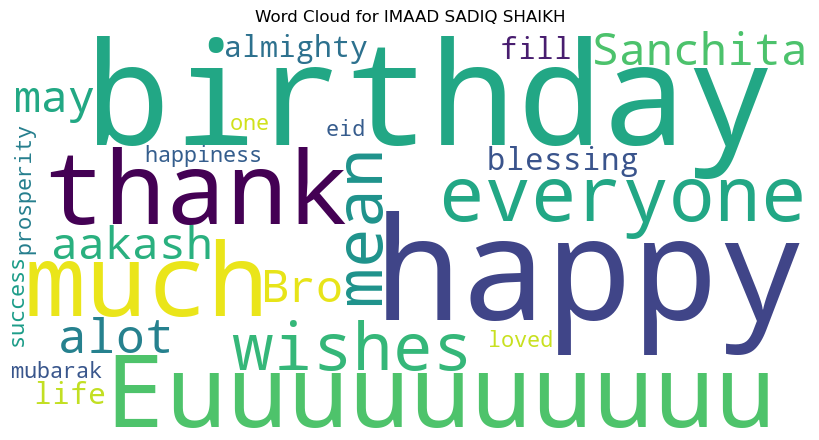

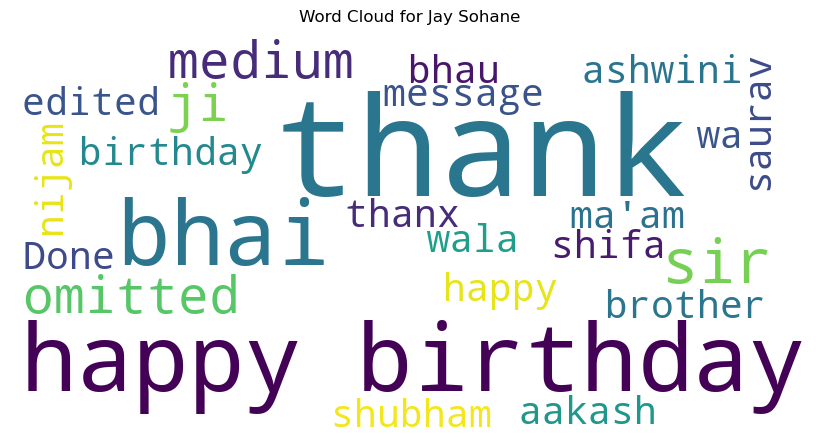

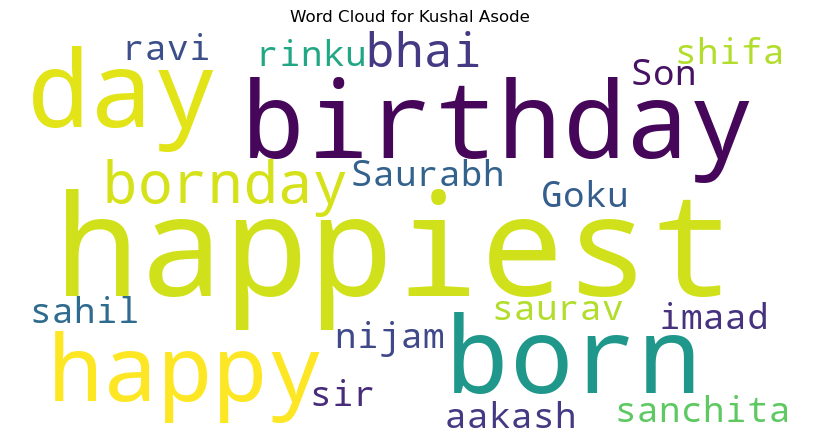

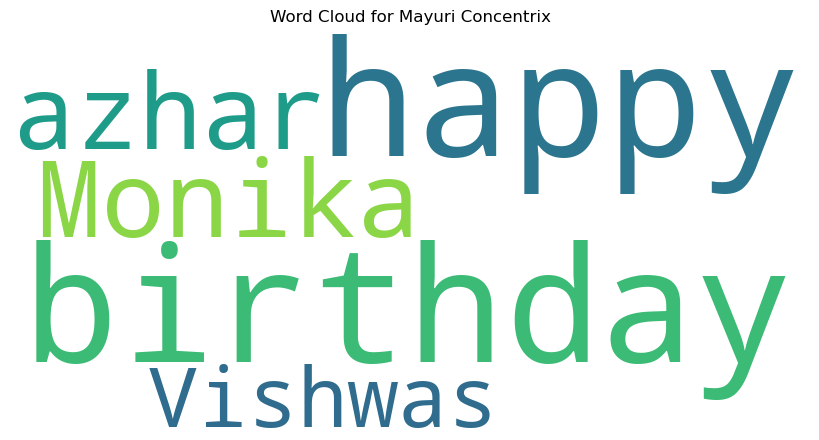

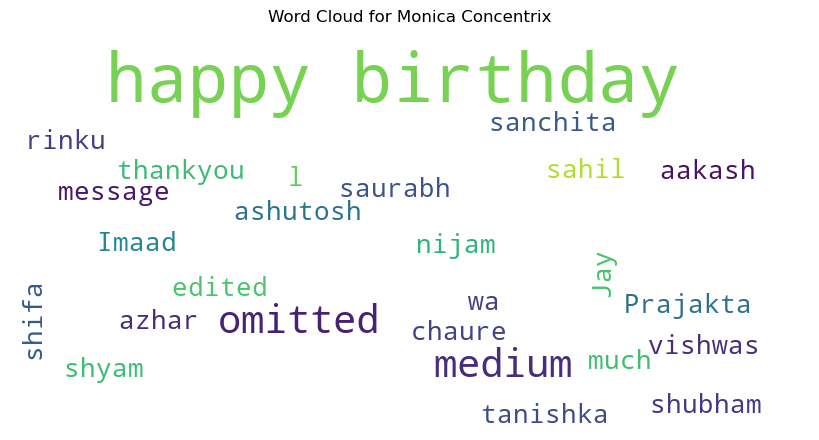

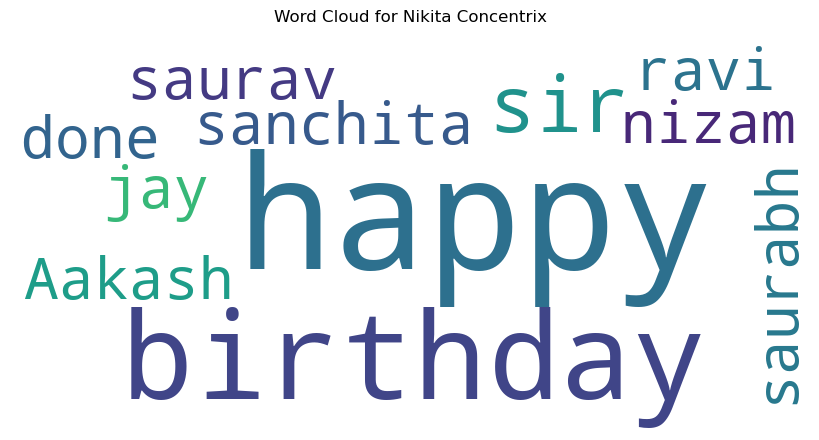

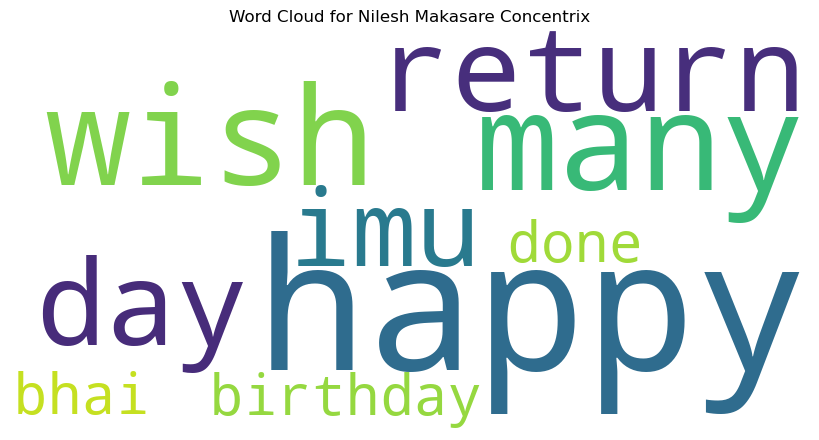

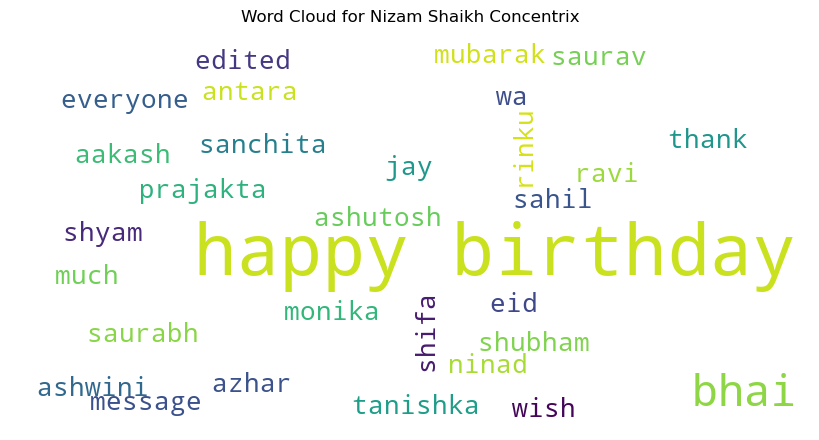

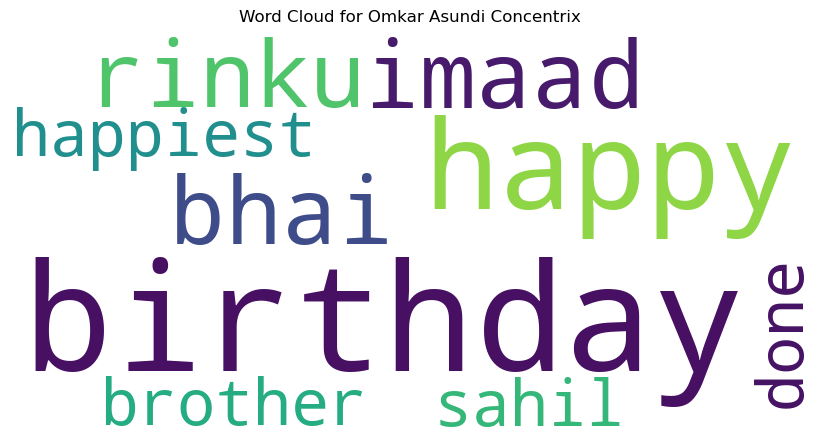

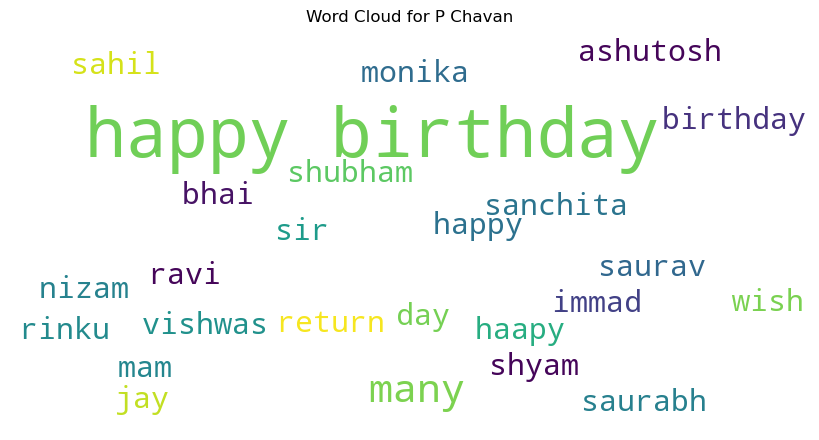

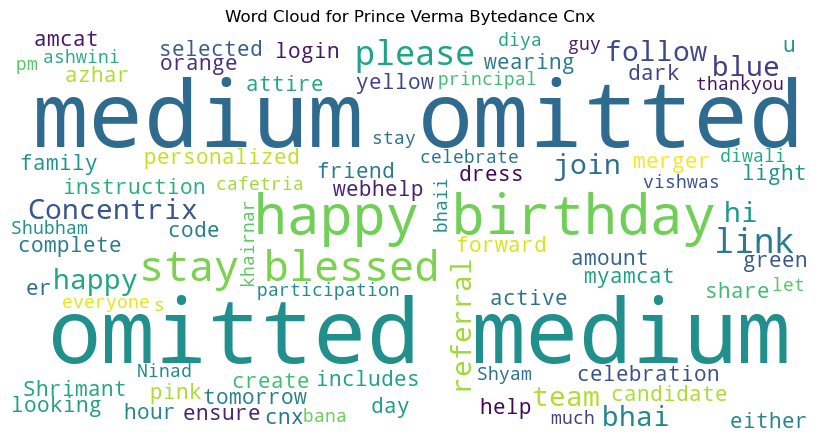

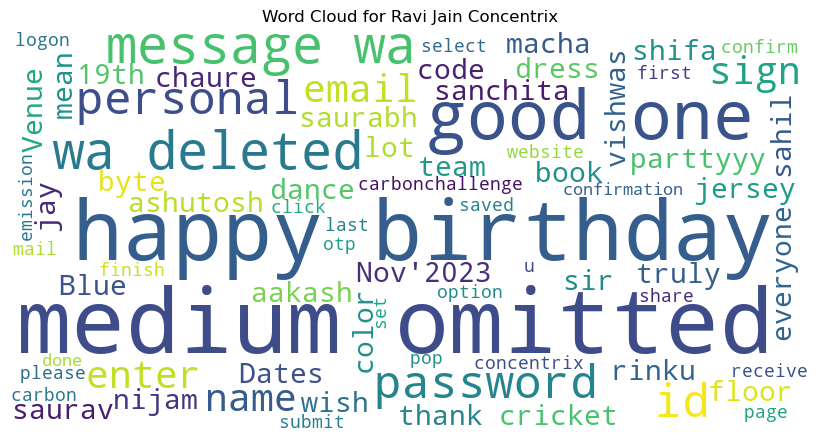

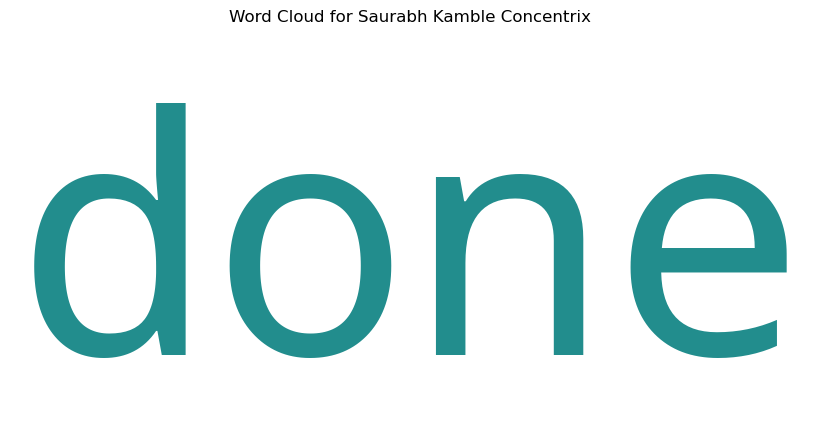

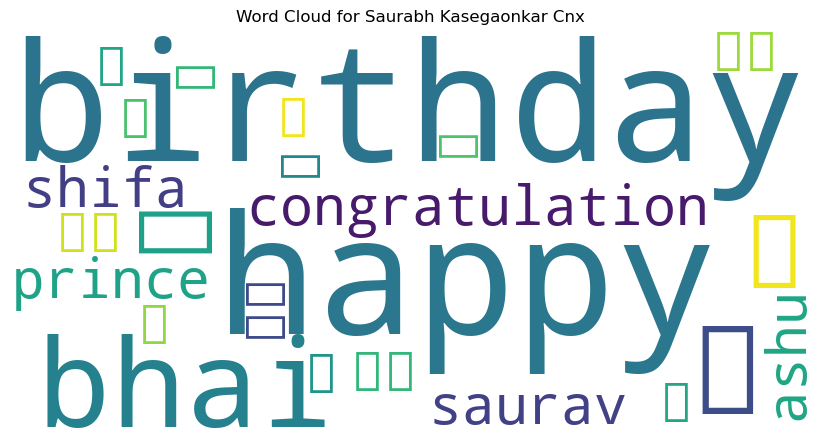

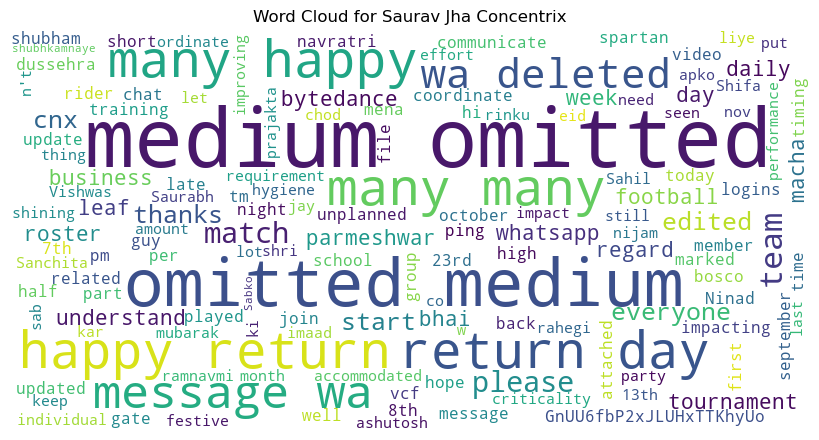

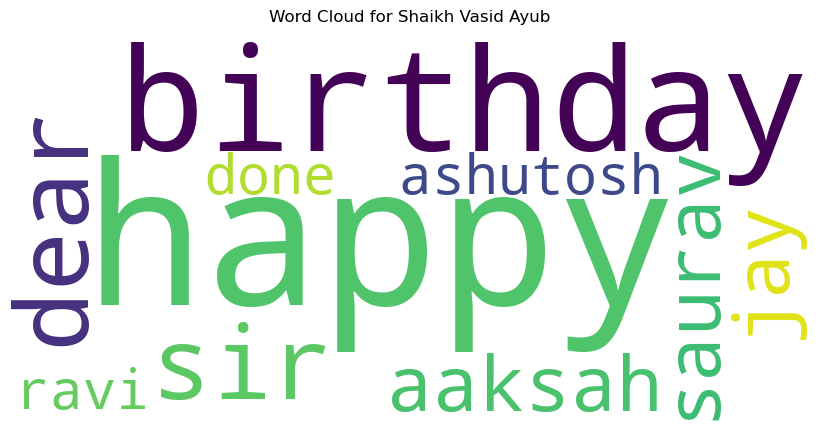

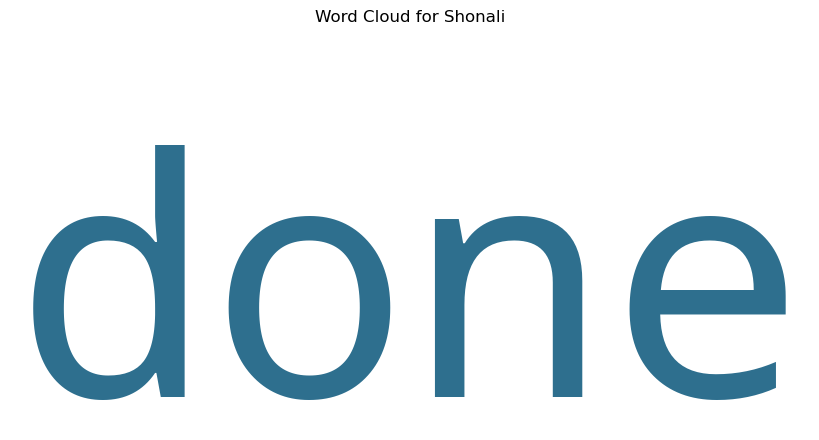

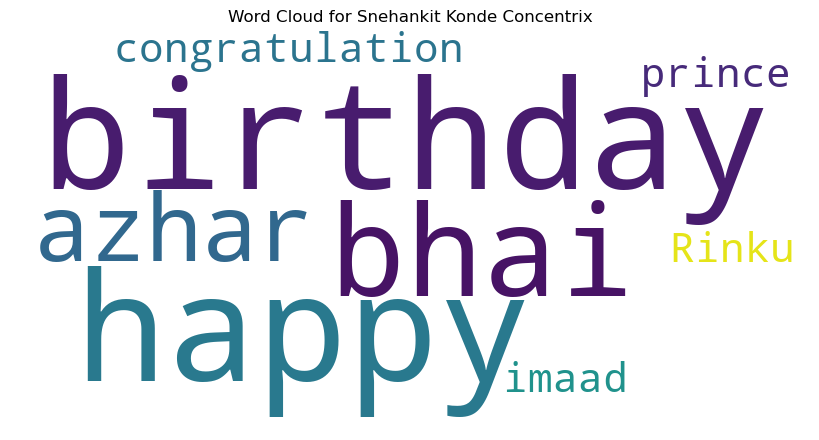

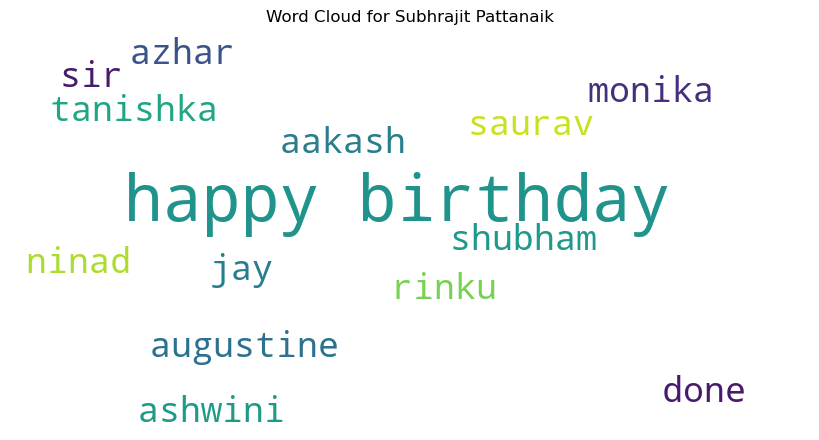

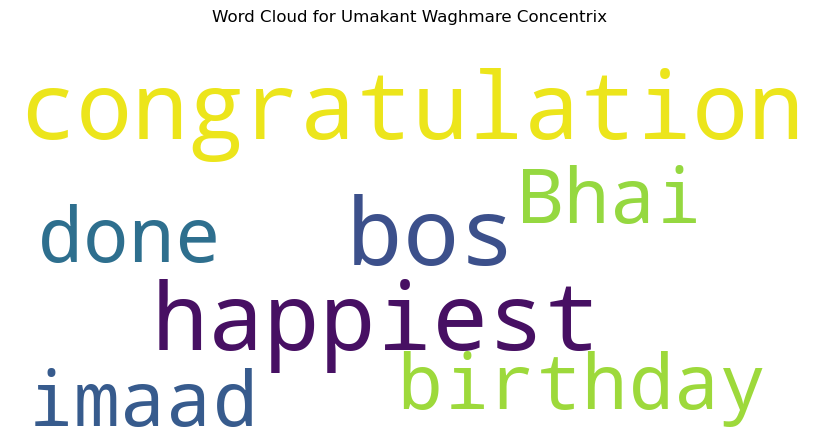

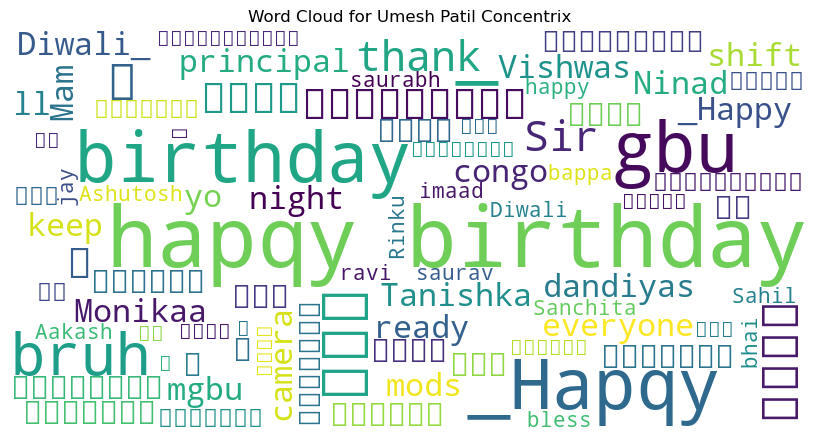

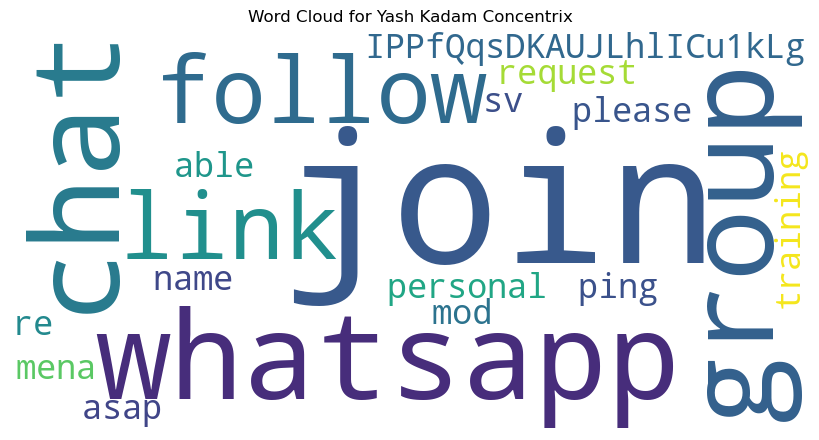

In [17]:
###Bonus , grouping wordclouds by author & saving them all to our system :D ########
##### Creating word clouds for processed chat data (our df of cleaned_messages)


grouped_messages = df.groupby('author')['cleaned_messages'].apply(lambda x: ' '.join(x)).reset_index()

# Generate a word cloud for each author
for index, row in grouped_messages.iterrows():
    author = row['author']
    text = row['cleaned_messages']

    # Generate the word cloud object for the author
    wordcloud = WordCloud(
        width = 800, height = 400,
        background_color = 'white', 
        stopwords = None,  # add your stopword list if needed
        min_font_size = 10
    ).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {author}")
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

    # Optionally, save each author's word cloud to a file
    wordcloud.to_file(f"{author}_cloud.png")